import

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
import matplotlib.image as mpimg
from matplotlib import rcParams

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

## (1) - data analysis of meteorological conditions

Given data from a meteorological station of the area, calculate frequencies and average behavior of wind and stability classes 

In [45]:
path = '/Users/iditbela/Documents/Shai_Kendler/Borg-1.9/meteorological_data/'
df = pd.read_pickle(path + 'WD_WS_stdWD_2004_2018_Hadera_with_SC')

In [46]:
df.head()

WD   WS  stdWD            datetime  day   sigma_a SC
datetime                                                                    
2003-12-31 22:50:00  112.0  2.4    6.6 2003-12-31 22:50:00  0.0  6.413138  E
2003-12-31 23:00:00  109.0  2.2    7.3 2003-12-31 23:00:00  0.0  6.745616  E
2003-12-31 23:10:00  107.0  2.2    5.1 2003-12-31 23:10:00  0.0  6.525208  E
2003-12-31 23:20:00  106.0  2.1    6.1 2003-12-31 23:20:00  0.0  6.540642  E
2003-12-31 23:30:00  105.0  2.2    5.7 2003-12-31 23:30:00  0.0  6.345077  E

In [47]:
# drop sigma_a column, as it is not necessary
df.drop(columns = 'sigma_a', axis=1,inplace=True)

In [48]:
df.head()
# df.info()

WD   WS  stdWD            datetime  day SC
datetime                                                          
2003-12-31 22:50:00  112.0  2.4    6.6 2003-12-31 22:50:00  0.0  E
2003-12-31 23:00:00  109.0  2.2    7.3 2003-12-31 23:00:00  0.0  E
2003-12-31 23:10:00  107.0  2.2    5.1 2003-12-31 23:10:00  0.0  E
2003-12-31 23:20:00  106.0  2.1    6.1 2003-12-31 23:20:00  0.0  E
2003-12-31 23:30:00  105.0  2.2    5.7 2003-12-31 23:30:00  0.0  E

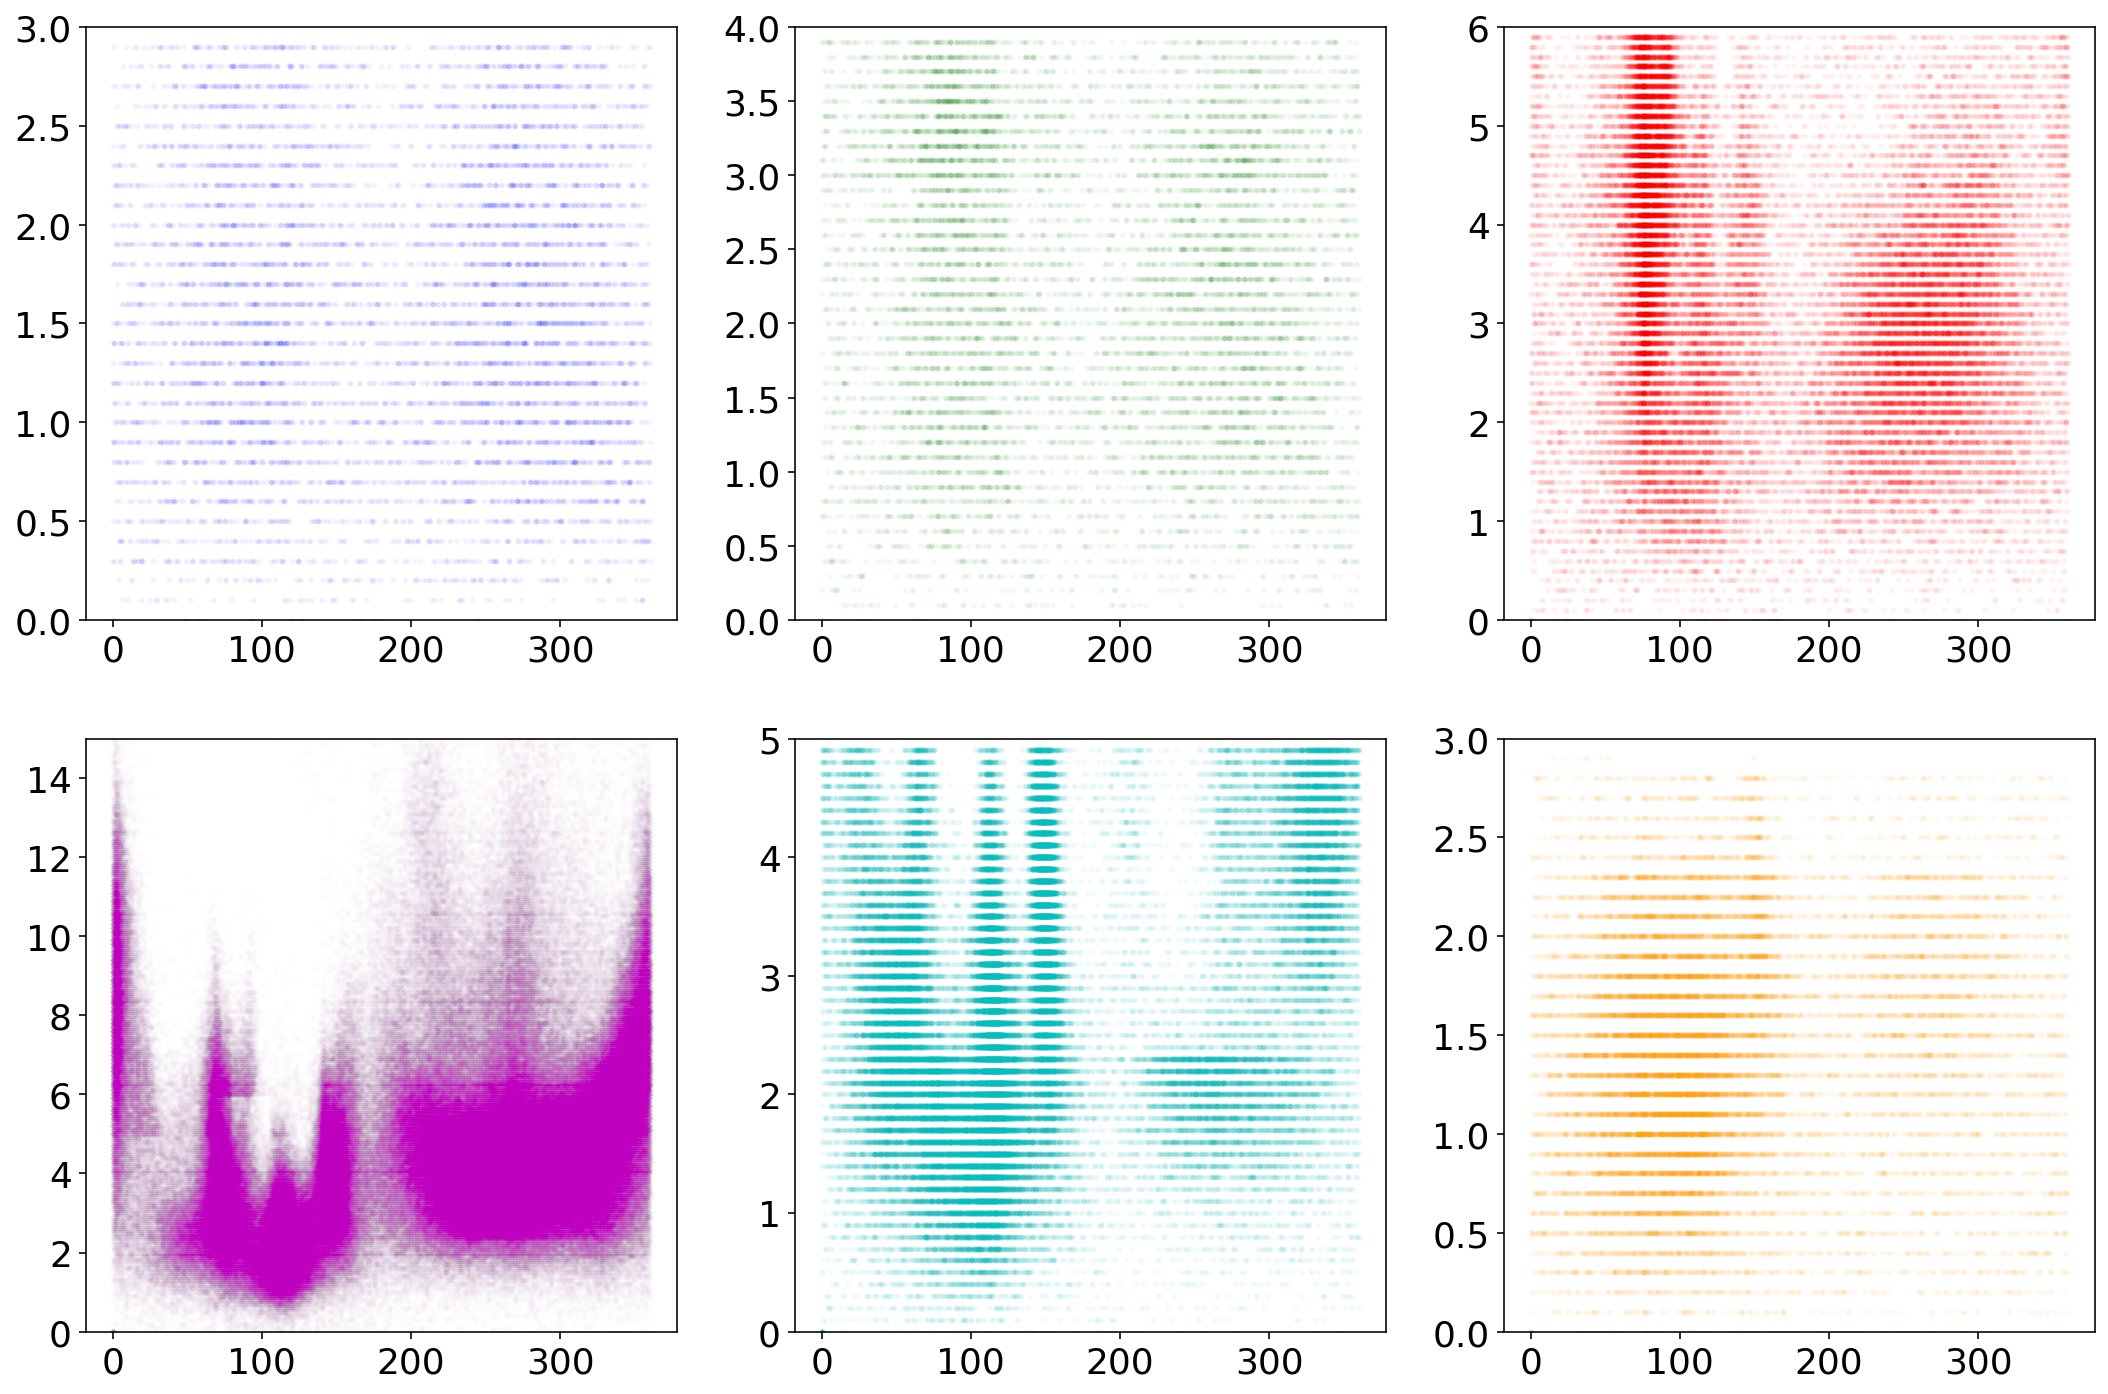

In [50]:


fig, ax = plt.subplots(2,3,figsize = (18, 12))
ax[0,0].plot(df[df['SC']=='A'].WD, df[df['SC']=='A'].WS, marker='o', linestyle='', ms=2, c='b',alpha=0.03)
ax[0,0].set_ylim([0, 3])
ax[0,1].plot(df[df['SC']=='B'].WD, df[df['SC']=='B'].WS, marker='o', linestyle='', ms=2, c='g',alpha=0.03)
ax[0,1].set_ylim([0, 4])
ax[0,2].plot(df[df['SC']=='C'].WD, df[df['SC']=='C'].WS, marker='o', linestyle='', ms=2, c='r',alpha=0.03)
ax[0,2].set_ylim([0, 6])
ax[1,0].plot(df[df['SC']=='D'].WD, df[df['SC']=='D'].WS, marker='o', linestyle='', ms=2, c='m',alpha=0.009)
ax[1,0].set_ylim([0, 15])
ax[1,1].plot(df[df['SC']=='E'].WD, df[df['SC']=='E'].WS, marker='o', linestyle='', ms=2, c='c',alpha=0.03)
ax[1,1].set_ylim([0, 5])
ax[1,2].plot(df[df['SC']=='F'].WD, df[df['SC']=='F'].WS, marker='o', linestyle='', ms=2, c='orange',alpha=0.03)
ax[1,2].set_ylim([0, 3])

# plt.subplots_adjust(wspace=0, hspace=0);
plt.show();

In [121]:
### FREQUENCY PLOTS OF
# DAY - 6 PLOTS - ONE FOR EACH SC. 
# NIGHT - 3 PLOTS - ONE FOR EACH SC. 

In [133]:
def plotFrequency(df,title):  
    
    binedges_s = np.concatenate((np.arange(0,11,1),[100]))
    binlabels_s = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','>10']
    # speed_bins = pd.cut(df.WS,bins=binedges_s ,labels=binlabels_s)
    binedges_d = np.arange(0,370,10)
    binlabels_d = ['0-10','10-20','20-30','30-40','40-50','50-60',
                   '60-70','70-80','80-90','90-100','100-110','110-120','120-130',
                   '130-140','140-150','150-160','160-170','170-180','180-190','190-200',
                   '200-210','210-220','220-230','230-240','240-250','250-260','260-270',
                   '270-280','280-290','290-300','300-310','310-320','320-330','330-340',
                   '340-350','350-360']
    
    comb = pd.DataFrame(list(product(binlabels_s, binlabels_d)), columns=['s', 'd'])
    df_360 = pd.DataFrame(comb)
    df_360['count'] = np.random.randn(np.size(df_360,0)) # fill in random data
    ind = 0
    for s_edge in range(0,np.size(binedges_s)-1):
        temp_df = df[(df.WS>binedges_s[s_edge]) & (df.WS<=binedges_s[s_edge+1])]
        for edge in binedges_d[:-1]:  
            temp_temp_df = temp_df[(temp_df.WD>edge) & (temp_df.WD<=edge+10)]
            df_360.iloc[ind,2] = np.size(temp_temp_df,0)
            ind += 1
    df_360['percent'] = df_360['count']/df_360['count'].sum()
    # reshape
    # create a matrix of wind speeds and directions 
    S,D = np.meshgrid(np.arange(0,11,1),np.arange(0,360,10));
    # reshape windfrequencies to matrix 
    WF = np.reshape(df_360.percent.values,(D.shape[1],D.shape[0]))
    
    # generate 2 2d grids for the x & y bounds
    y, x = np.meshgrid(np.arange(0,12,1),np.arange(0,370,10));
    z = WF
    fig, ax = plt.subplots()
    # z = z[:-1, :-1]

    c = ax.pcolormesh(np.transpose(x), np.transpose(y), z, cmap='RdBu_r')
    ax.set_title(title+'\n') # day or night
    # set the limits of the plot to the limits of the data
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax, label='\nRelative frequency')
    plt.xlabel('\nWind direction [deg.]')
    plt.ylabel('\nWind speed [m $s^{-1}$]\n')
    plt.yticks(np.arange(0.5,11.5,1), (binlabels_s))
    plt.rcParams.update({'font.size': 12})
    plt.show();
    return fig 



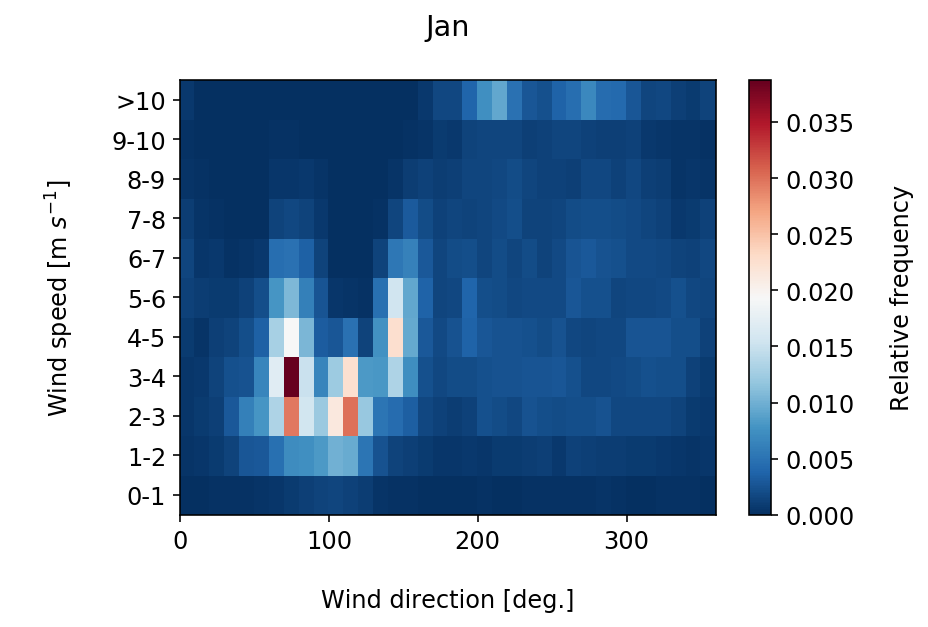

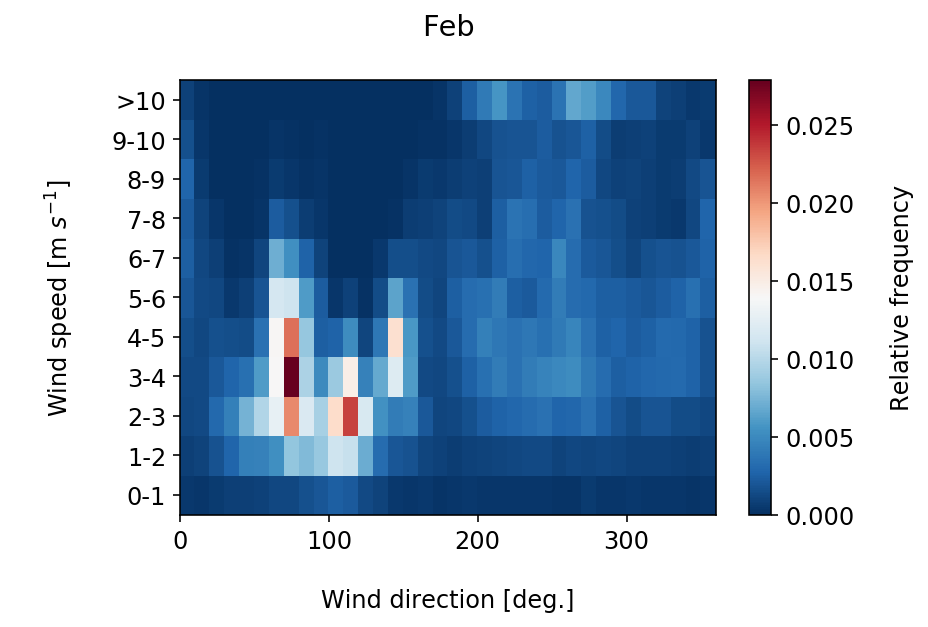

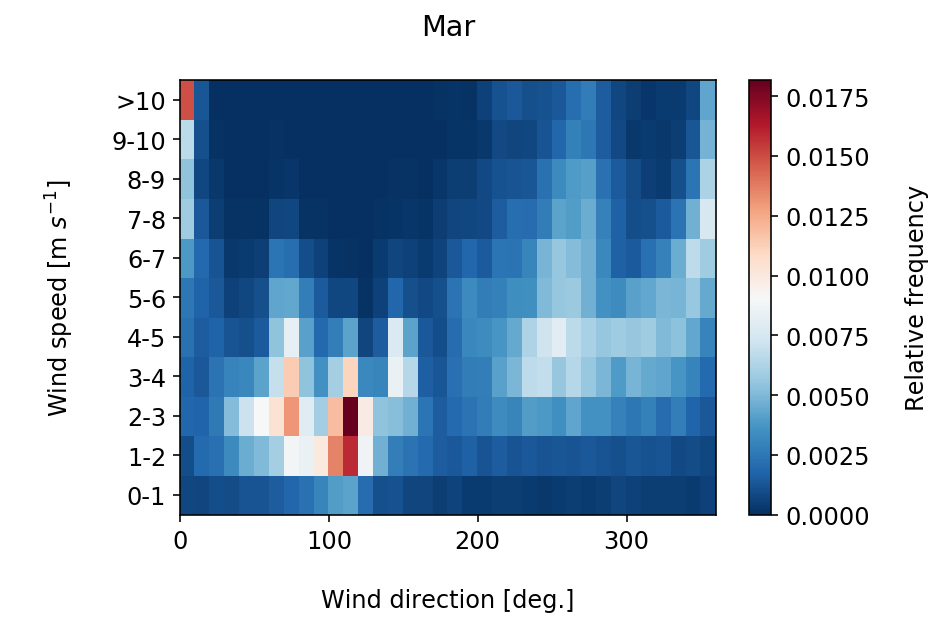

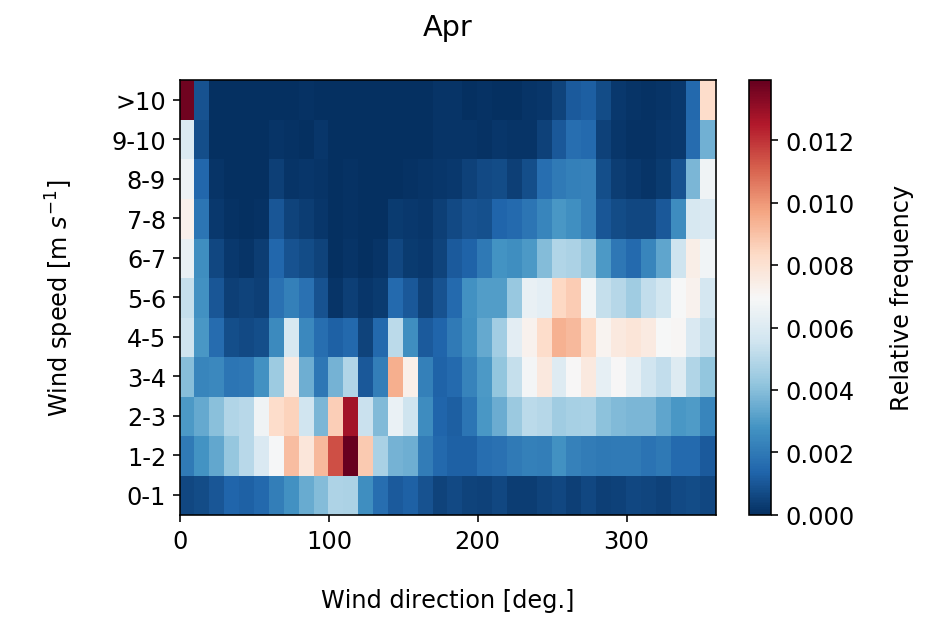

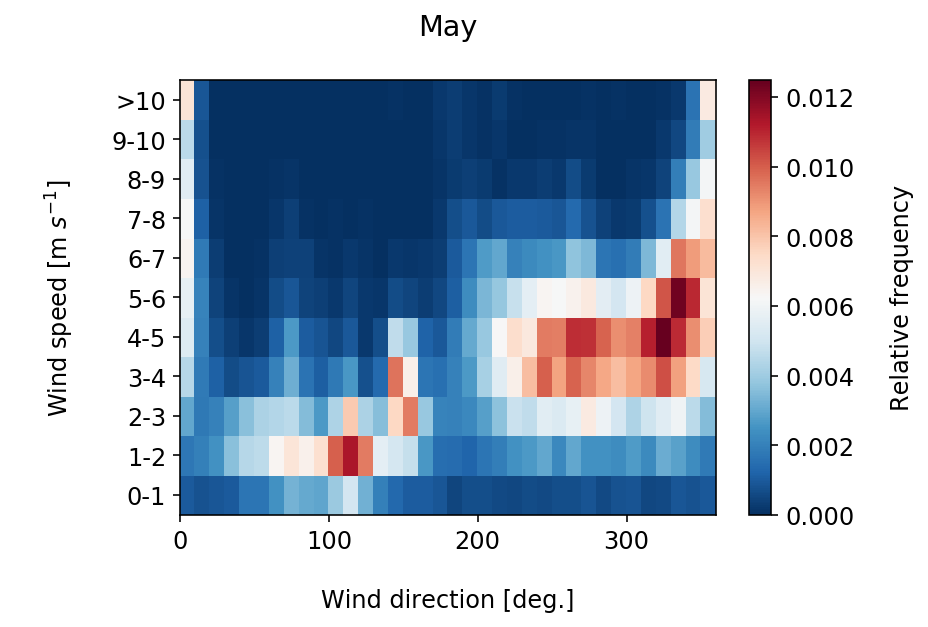

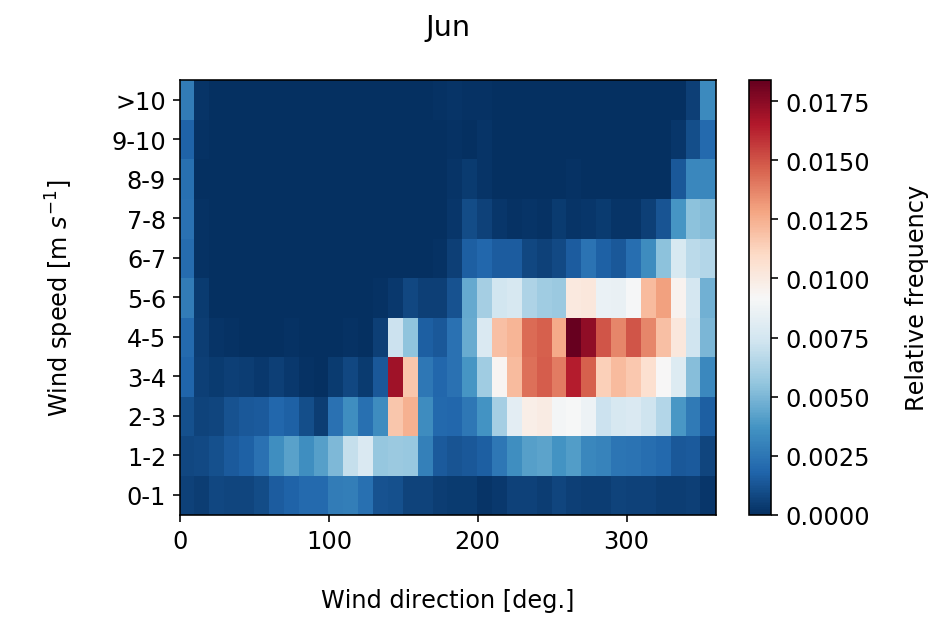

In [138]:
# month - 1
m = 1
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f1 = plotFrequency(df_func,'Jan')

# month - 2
m = 2
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f2 = plotFrequency(df_func,'Feb')

# month - 3
m = 3
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f3 = plotFrequency(df_func,'Mar')


# month - 4
m = 4
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f4 = plotFrequency(df_func,'Apr')

# month - 5
m = 5
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f5 = plotFrequency(df_func,'May')

# month - 6
m = 6
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f6 = plotFrequency(df_func,'Jun')


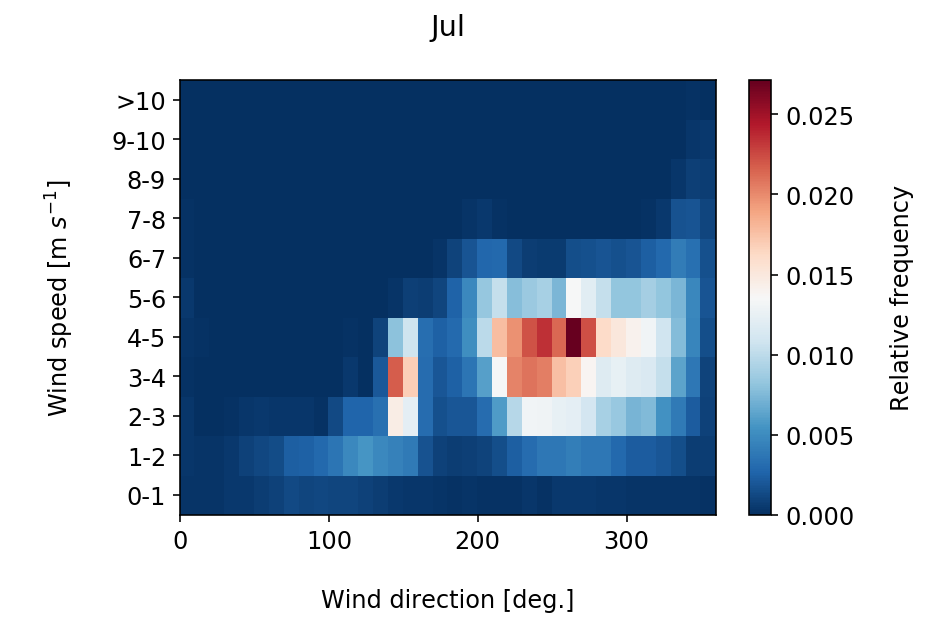

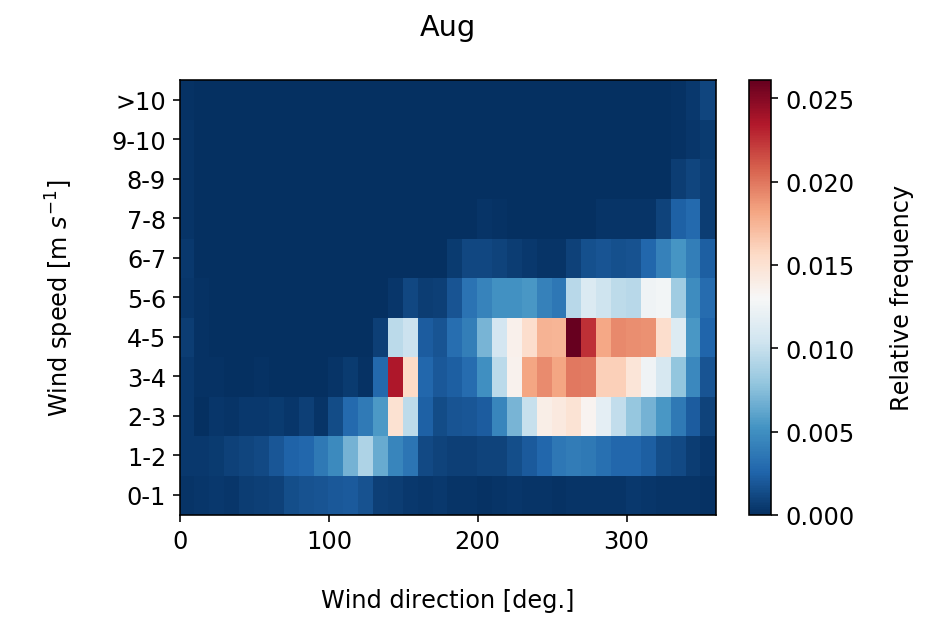

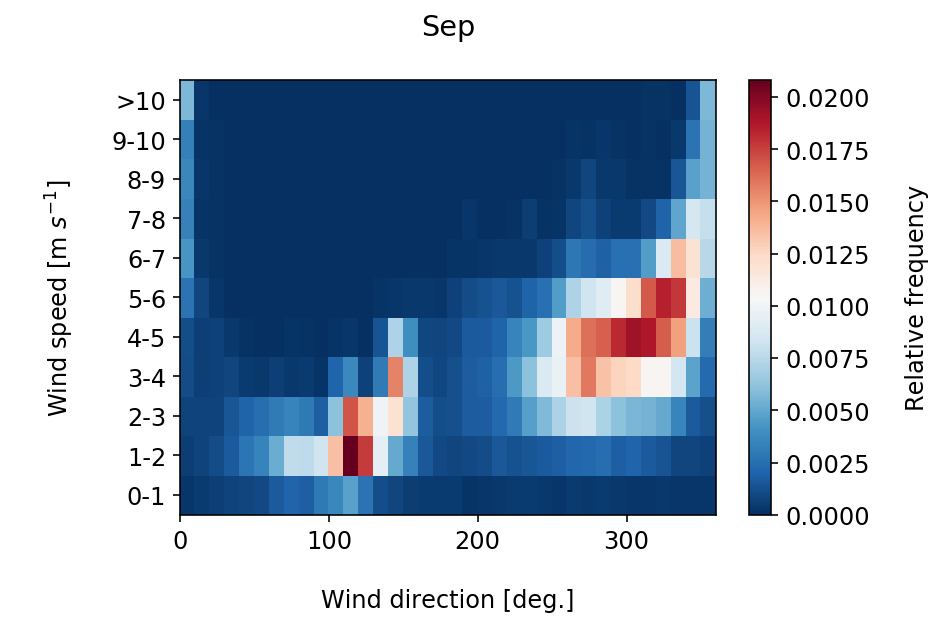

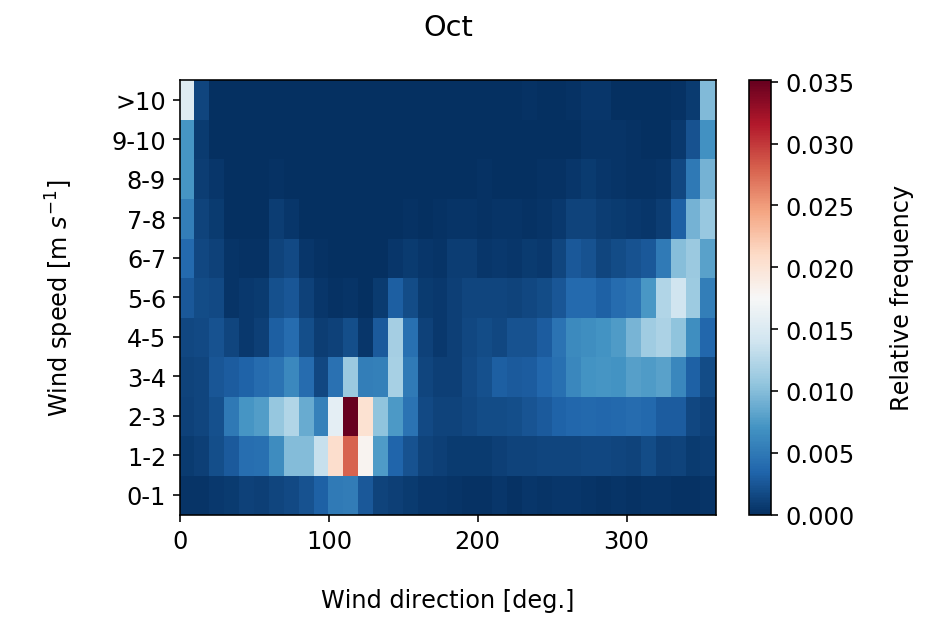

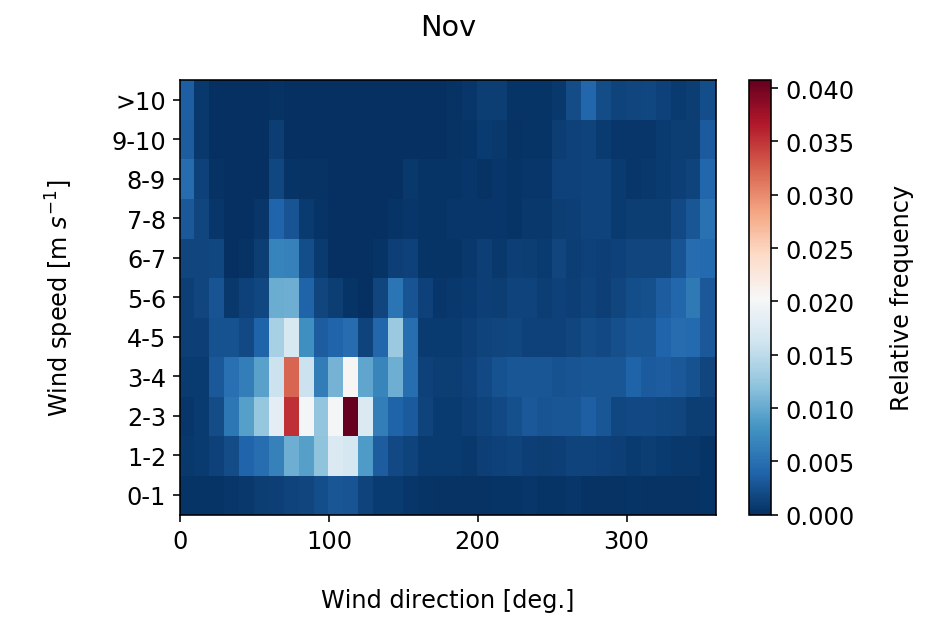

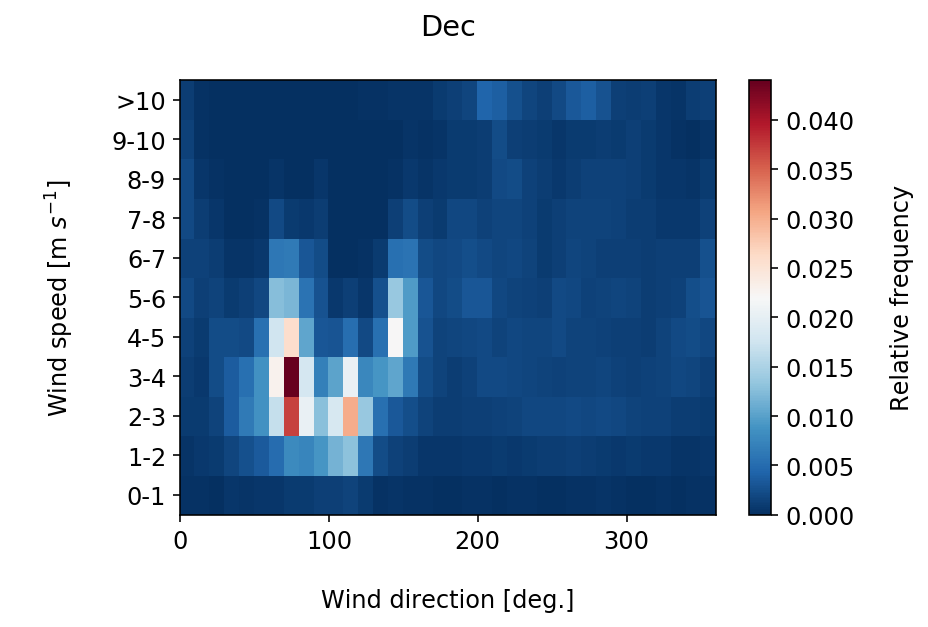

In [139]:
# month - 7
m = 7
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f7 = plotFrequency(df_func,'Jul')

# month - 8
m = 8
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f8 = plotFrequency(df_func,'Aug')

# month - 9
m = 9
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f9 = plotFrequency(df_func,'Sep')


# month - 10
m = 10
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f10 = plotFrequency(df_func,'Oct')

# month - 11
m = 11
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f11 = plotFrequency(df_func,'Nov')

# month - 12
m = 12
df_func = df[pd.DatetimeIndex(df.datetime).month == m]
f12 = plotFrequency(df_func,'Dec')

In [140]:
# f1.savefig("Hadera_WF_month_1.png", bbox_inches='tight', dpi=400)
# f2.savefig("Hadera_WF_month_2.png", bbox_inches='tight', dpi=400)
# f3.savefig("Hadera_WF_month_3.png", bbox_inches='tight', dpi=400)
# f4.savefig("Hadera_WF_month_4.png", bbox_inches='tight', dpi=400)
# f5.savefig("Hadera_WF_month_5.png", bbox_inches='tight', dpi=400)
# f6.savefig("Hadera_WF_month_6.png", bbox_inches='tight', dpi=400)
# f7.savefig("Hadera_WF_month_7.png", bbox_inches='tight', dpi=400)
# f8.savefig("Hadera_WF_month_8.png", bbox_inches='tight', dpi=400)
# f9.savefig("Hadera_WF_month_9.png", bbox_inches='tight', dpi=400)
# f10.savefig("Hadera_WF_month_10.png", bbox_inches='tight', dpi=400)
# f11.savefig("Hadera_WF_month_11.png", bbox_inches='tight', dpi=400)
# f12.savefig("Hadera_WF_month_12.png", bbox_inches='tight', dpi=400)

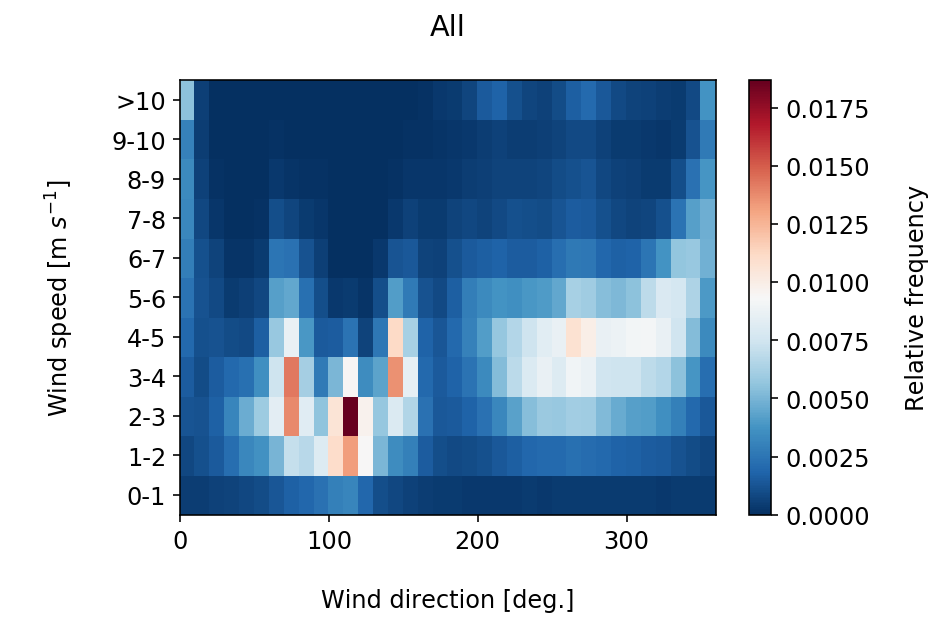

In [45]:
# all
f = plotFrequency(df,'All')

In [46]:
f.savefig("Hadera_WF_all.png", bbox_inches='tight', dpi=400)

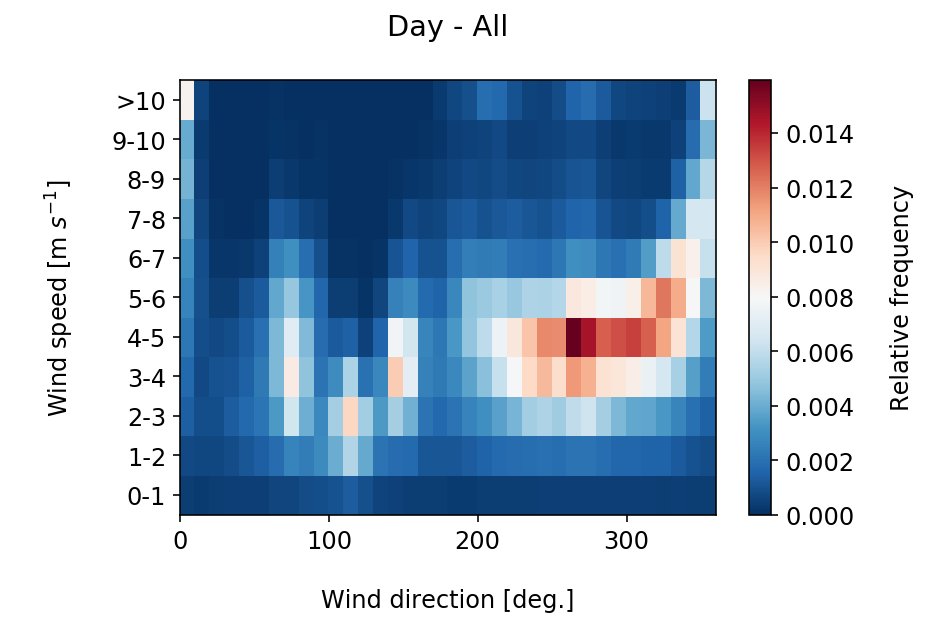

In [47]:
# day - all
isDay = 1
df_func = df[df.day==isDay]
f = plotFrequency(df_func,'Day - All')

In [48]:
f.savefig("Hadera_WF_day_all.png", bbox_inches='tight', dpi=400)

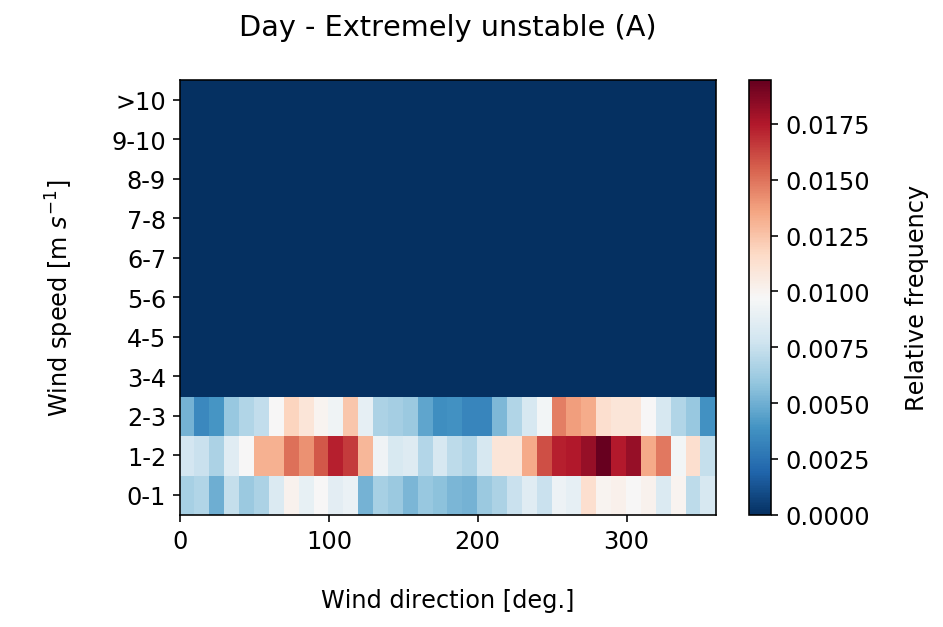

In [49]:
# day - SC-1 Ext unstable
isDay = 1
df_func = df[(df.day==isDay) & (df.SC=='A')]
f = plotFrequency(df_func,'Day - Extremely unstable (A)')

In [50]:
f.savefig("Hadera_WF_day_SC1.png", bbox_inches='tight', dpi=400)

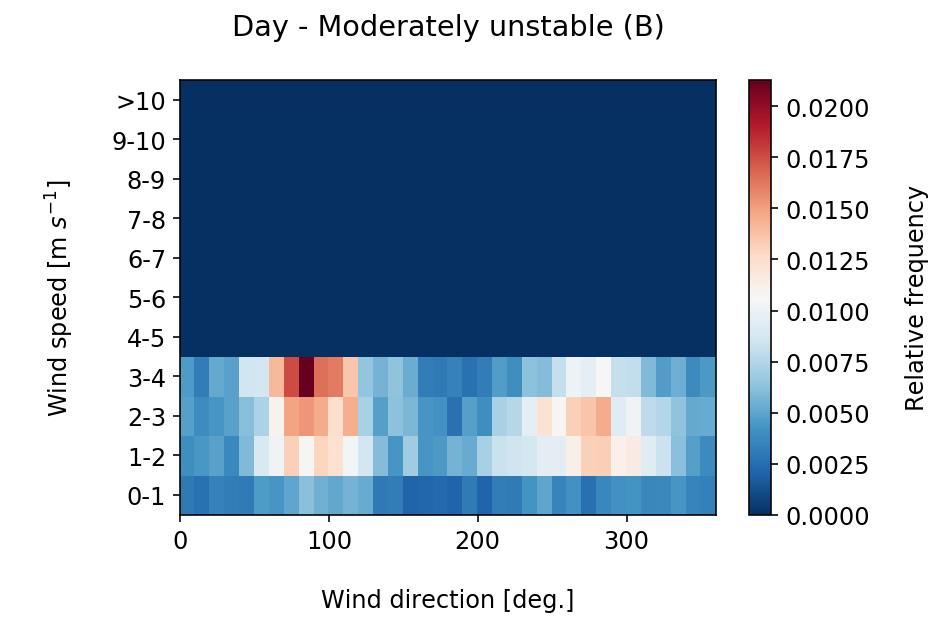

In [51]:
# day - SC-2 Mod unstable
isDay = 1
df_func = df[(df.day==isDay) & (df.SC=='B')]
f = plotFrequency(df_func,'Day - Moderately unstable (B)')

In [52]:
f.savefig("Hadera_WF_day_SC2.png", bbox_inches='tight', dpi=400)

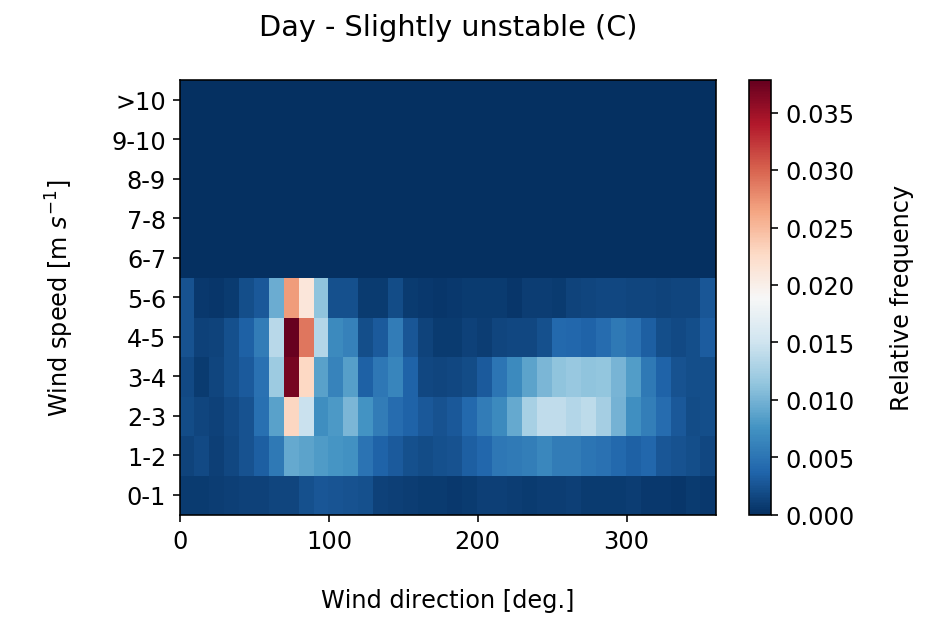

In [53]:
# day - SC-3 Slightly unstable
isDay = 1
df_func = df[(df.day==isDay) & (df.SC=='C')]
f = plotFrequency(df_func,'Day - Slightly unstable (C)')

In [54]:
f.savefig("Hadera_WF_day_SC3.png", bbox_inches='tight', dpi=400)

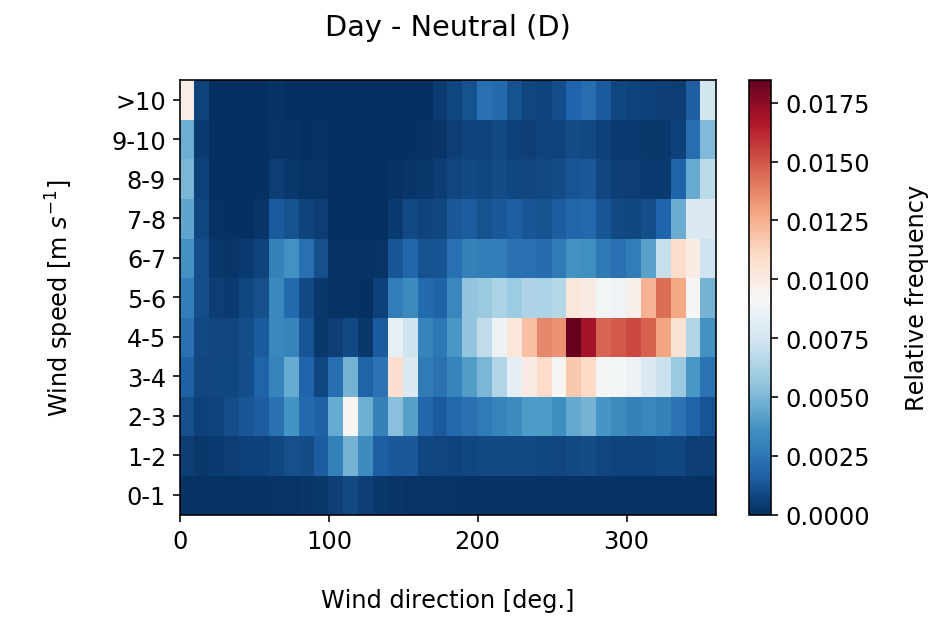

In [55]:
# day - SC-4 Neutral
isDay = 1
df_func = df[(df.day==isDay) & (df.SC=='D')]
f = plotFrequency(df_func,'Day - Neutral (D)')

In [56]:
f.savefig("Hadera_WF_day_SC4.png", bbox_inches='tight', dpi=400)

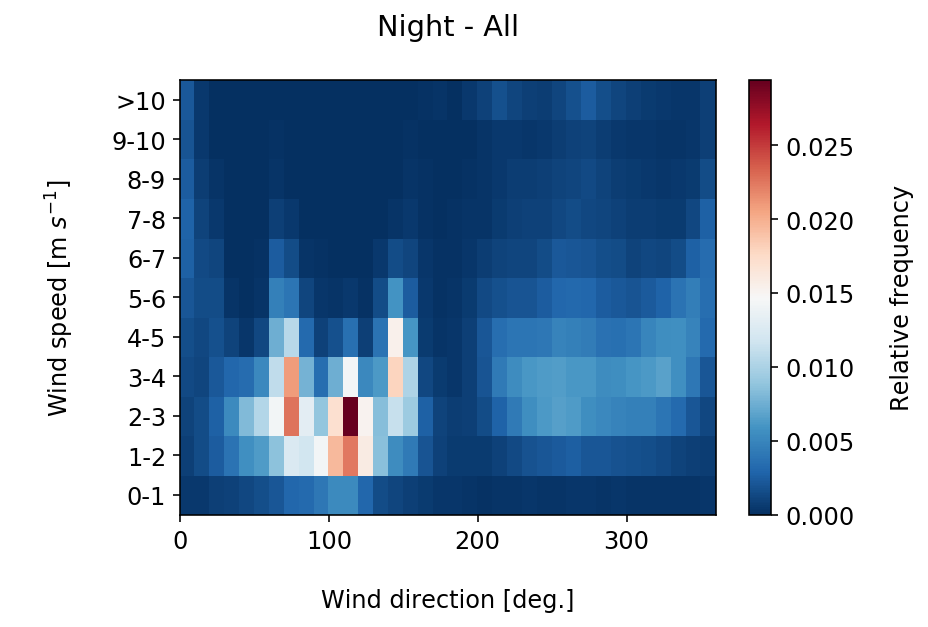

In [57]:
# night all
isDay = 0
df_func = df[(df.day==isDay)]
f = plotFrequency(df_func,'Night - All')

In [58]:
f.savefig("Hadera_WF_night_all.png", bbox_inches='tight', dpi=400)

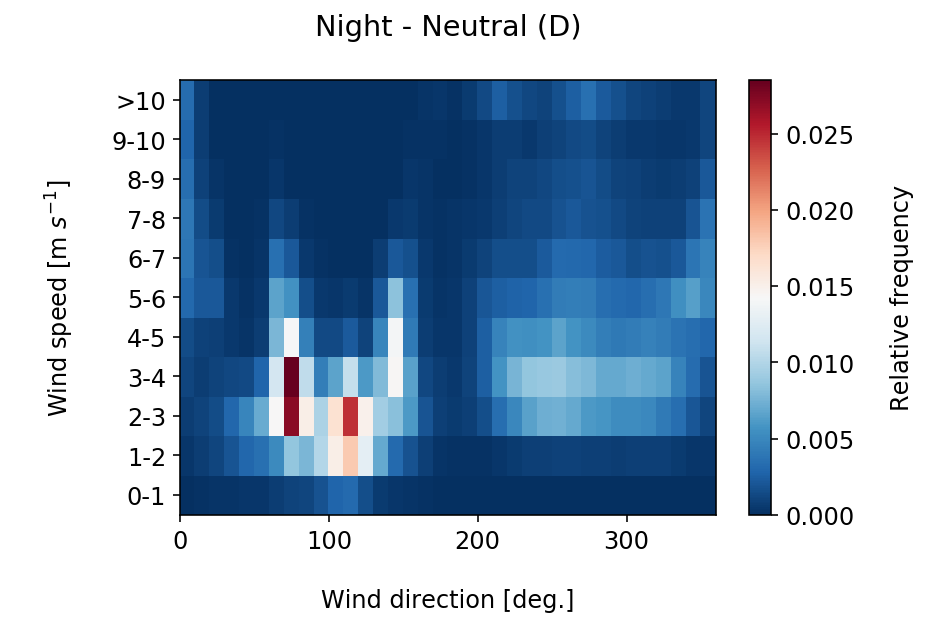

In [59]:
# night SC-4 Neutral
isDay = 0
df_func = df[(df.day==isDay) & (df.SC=='D')]
f = plotFrequency(df_func,'Night - Neutral (D)')

In [60]:
f.savefig("Hadera_WF_night_SC4.png", bbox_inches='tight', dpi=400)

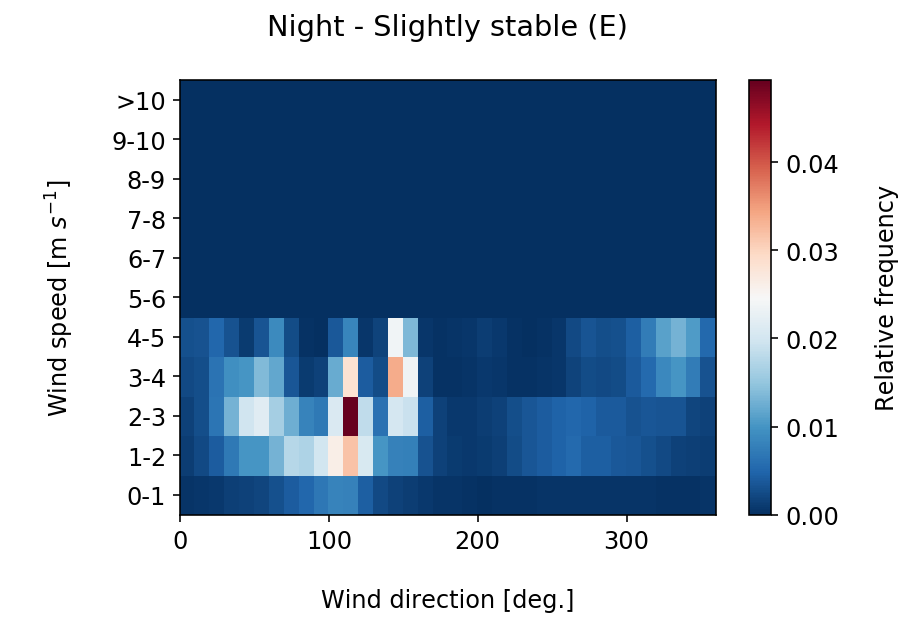

In [61]:
# night SC-5 slightly stable
isDay = 0
df_func = df[(df.day==isDay) & (df.SC=='E')]
f = plotFrequency(df_func,'Night - Slightly stable (E)')

In [62]:
f.savefig("Hadera_WF_night_SC5.png", bbox_inches='tight', dpi=400)

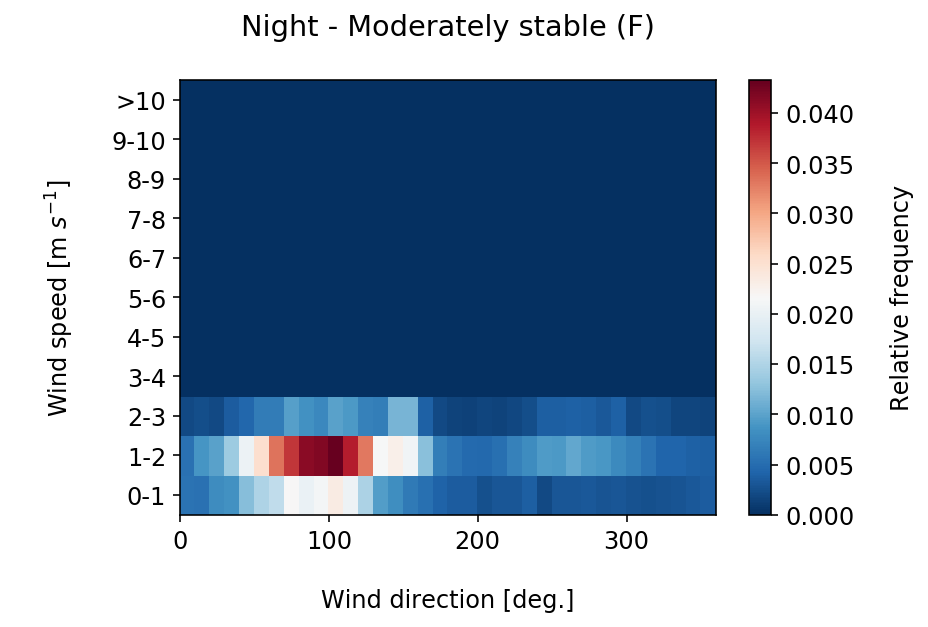

In [63]:
# night SC-6 - mod stable
isDay = 0
df_func = df[(df.day==isDay) & (df.SC=='F')]
f = plotFrequency(df_func,'Night - Moderately stable (F)')

In [64]:
f.savefig("Hadera_WF_night_SC6.png", bbox_inches='tight', dpi=400)

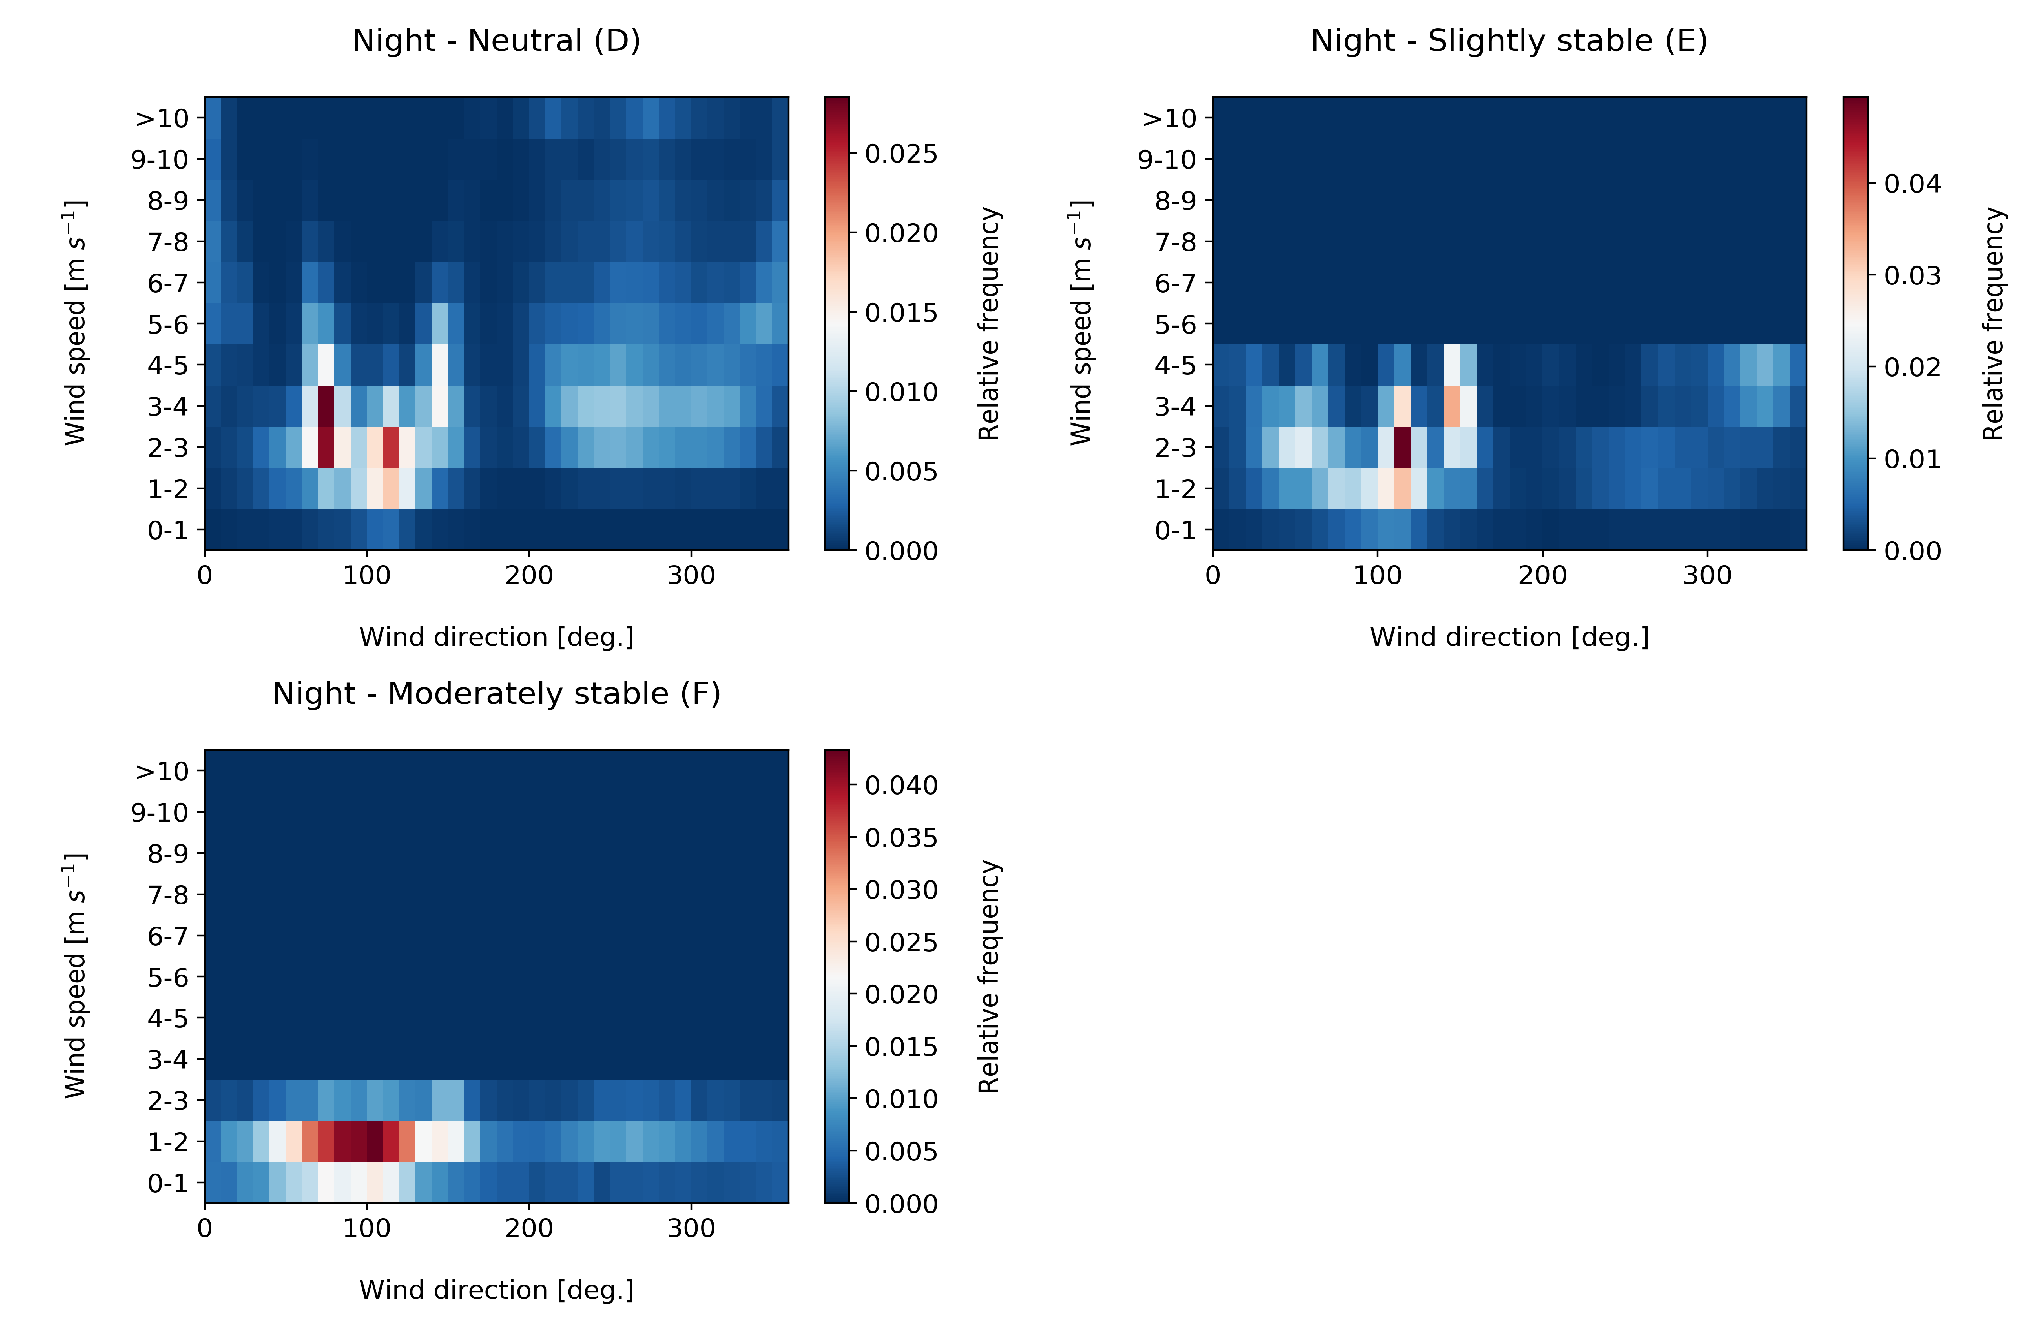

In [158]:
# load all saved images and display side by side
# rcParams['figure.figsize'] = 20 ,20

# read images
img_A = mpimg.imread('Hadera_WF_night_SC4.png')
img_B = mpimg.imread('Hadera_WF_night_SC5.png')
img_C = mpimg.imread('Hadera_WF_night_SC6.png')

# display images
fig, ax = plt.subplots(2,2,figsize = (18, 12))
ax[0,0].imshow(img_A,aspect = "auto");
ax[0,0].axis('off');
ax[0,1].imshow(img_B,aspect = "auto");
ax[0,1].axis('off');
ax[1,0].imshow(img_C,aspect = "auto");
ax[1,0].axis('off');
ax[1,1].axis('off');

plt.subplots_adjust(wspace=0, hspace=0);

In [66]:
fig.savefig("Hadera_WF_night_SC456.png", bbox_inches='tight', dpi=400)

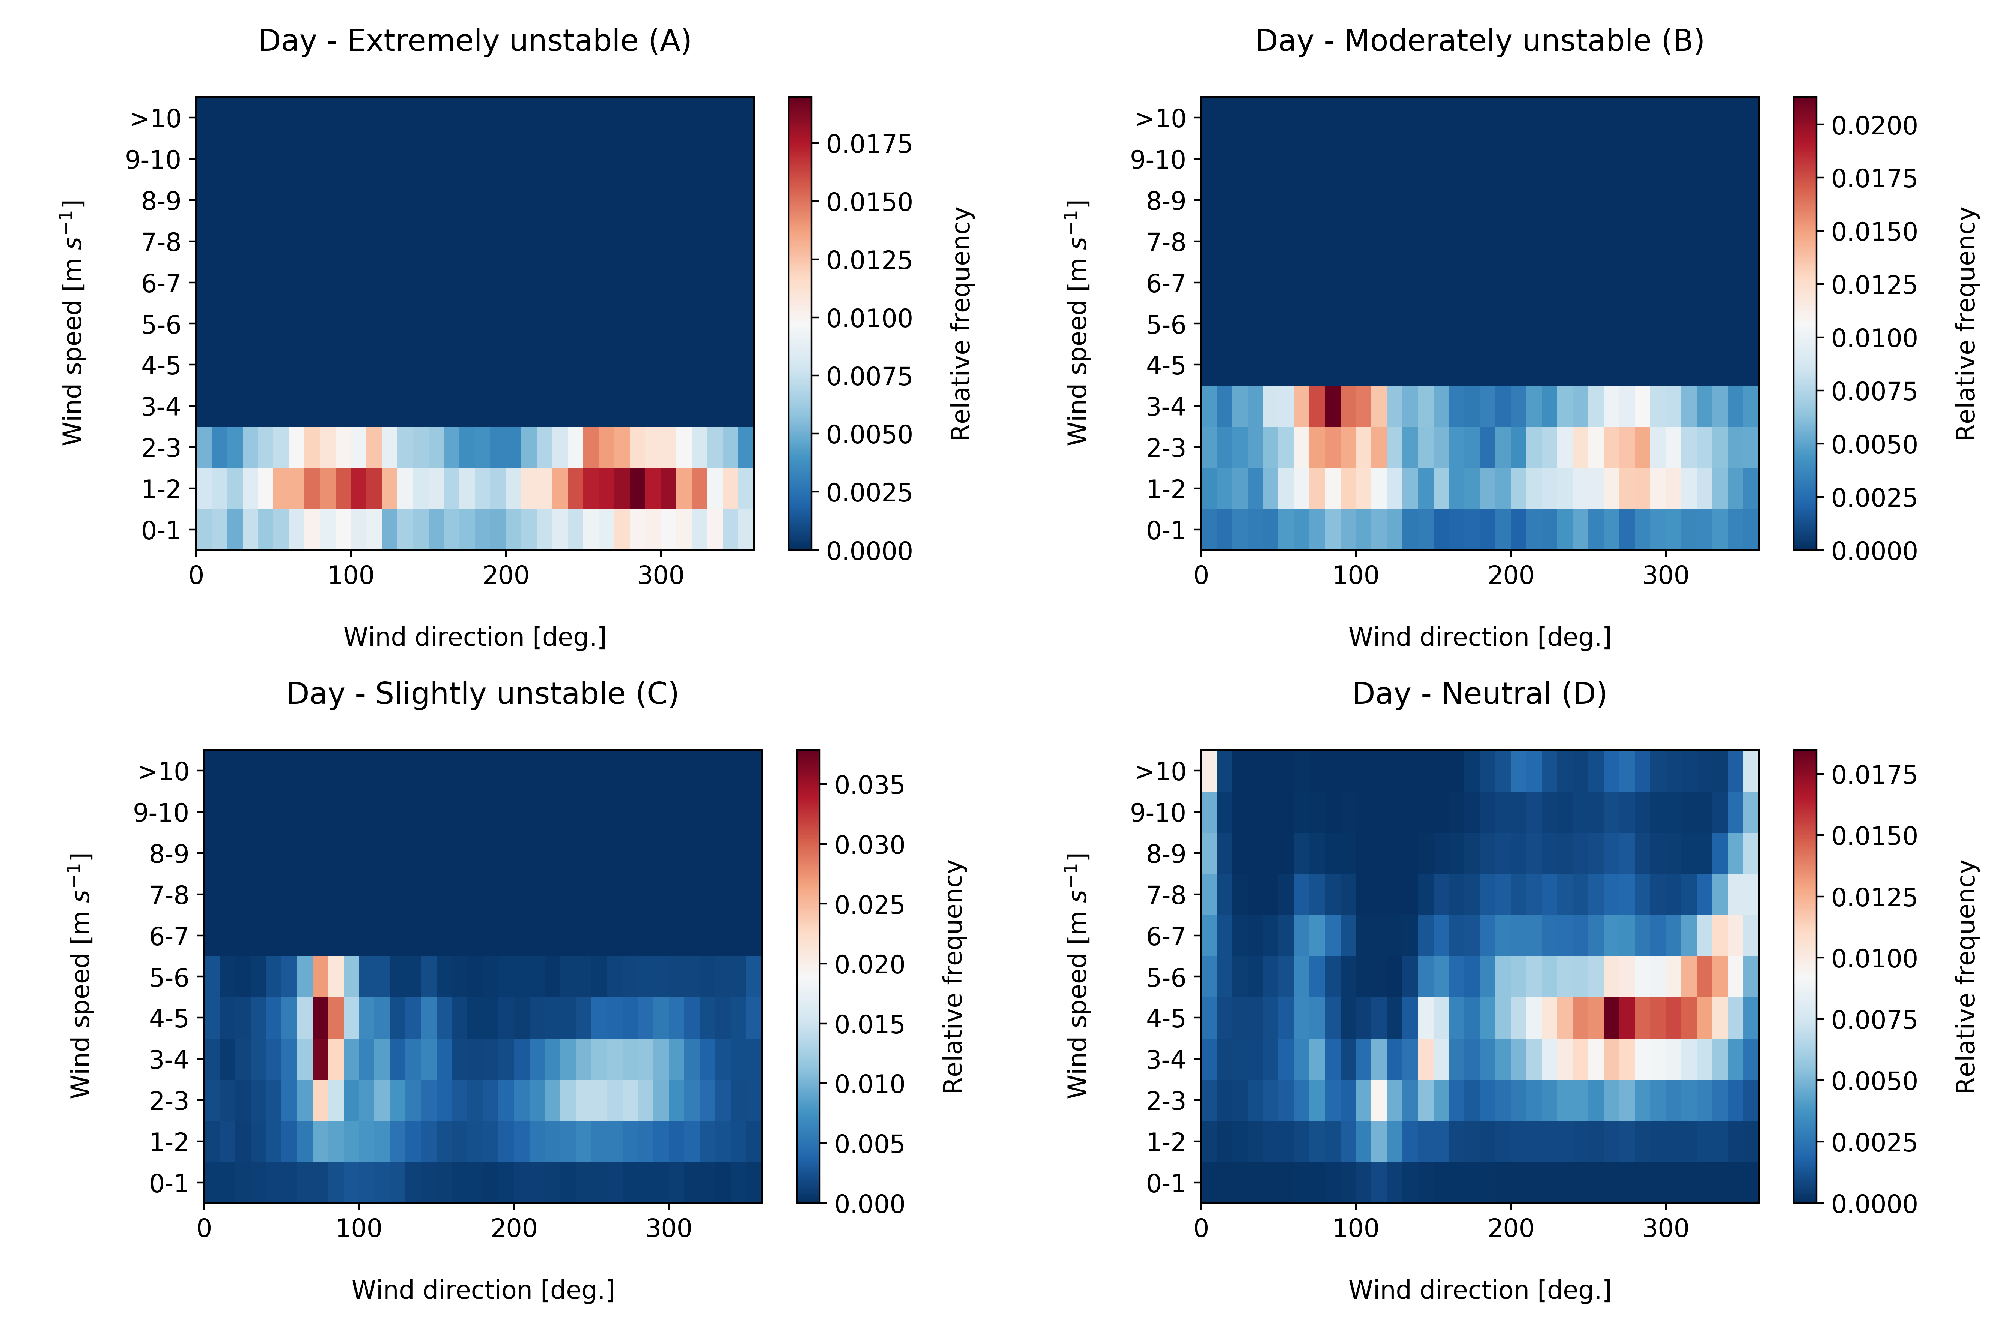

In [67]:
# load all saved images and display side by side
# rcParams['figure.figsize'] = 40 ,20

# read images
img_A = mpimg.imread('Hadera_WF_day_SC1.png')
img_B = mpimg.imread('Hadera_WF_day_SC2.png')
img_C = mpimg.imread('Hadera_WF_day_SC3.png')
img_D = mpimg.imread('Hadera_WF_day_SC4.png')

# display images
fig, ax = plt.subplots(2,2,figsize = (18, 12))
ax[0,0].imshow(img_A);
ax[0,0].axis('off');
ax[0,1].imshow(img_B);
ax[0,1].axis('off');
ax[1,0].imshow(img_C);
ax[1,0].axis('off');
ax[1,1].imshow(img_D);
ax[1,1].axis('off');

plt.subplots_adjust(wspace=0, hspace=0);

In [68]:
fig.savefig("Hadera_WF_day_SC1234.png", bbox_inches='tight', dpi=400)

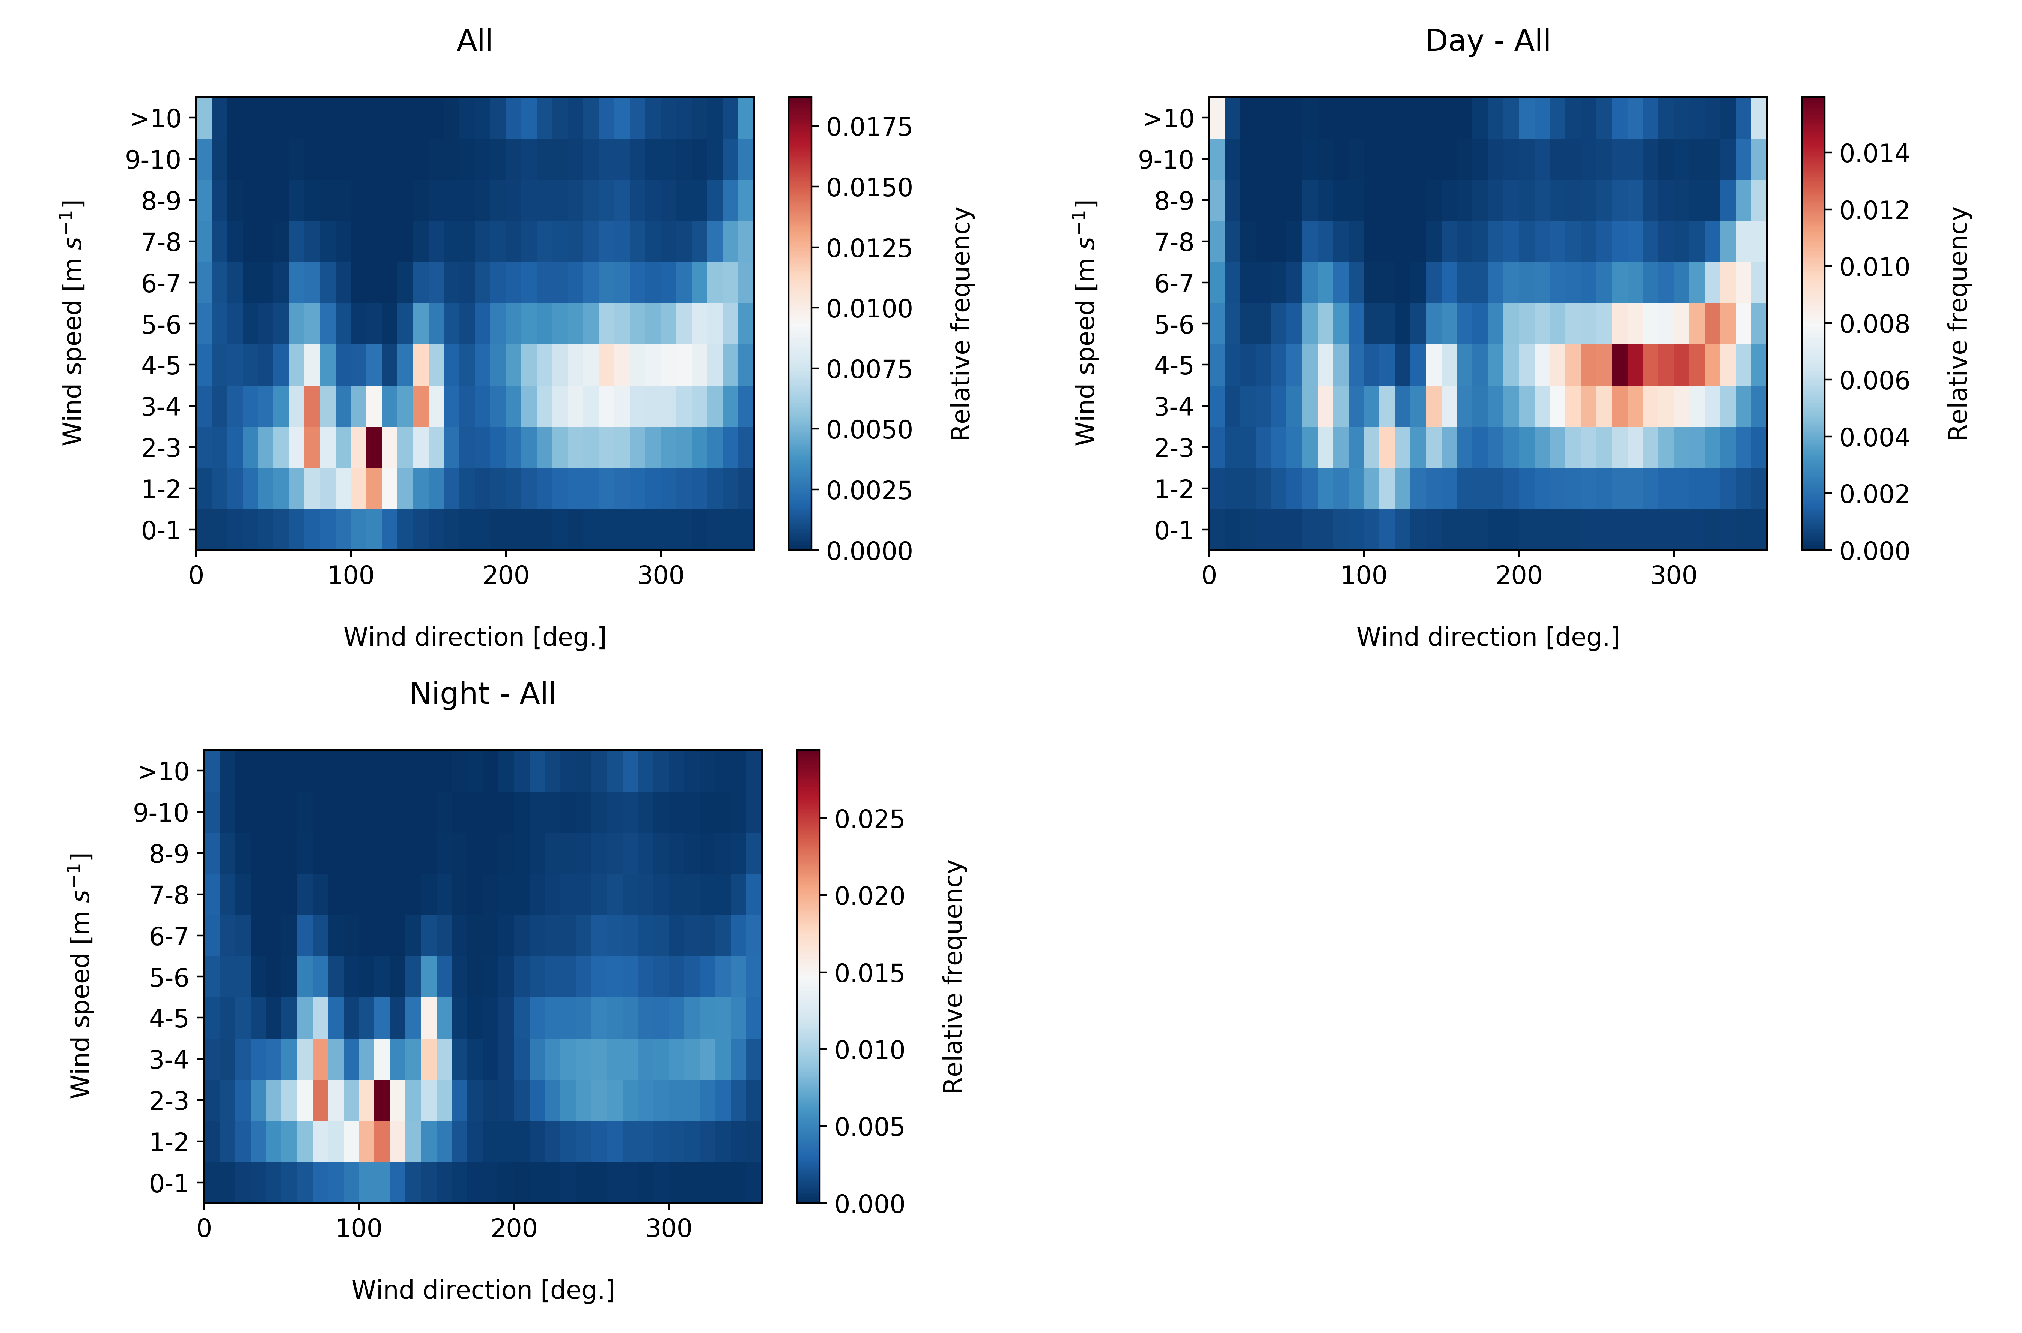

In [69]:
# load all saved images and display side by side

# read images
img_A = mpimg.imread('Hadera_WF_all.png')
img_B = mpimg.imread('Hadera_WF_day_all.png')
img_C = mpimg.imread('Hadera_WF_night_all.png')

# display images
fig, ax = plt.subplots(2,2,figsize = (18, 12))
ax[0,0].imshow(img_A);
ax[0,0].axis('off');
ax[0,1].imshow(img_B);
ax[0,1].axis('off');
ax[1,0].imshow(img_C);
ax[1,0].axis('off');

ax[1,1].axis('off');

plt.subplots_adjust(wspace=0, hspace=0);

In [70]:
fig.savefig("Hadera_WF_all_day_night.png", bbox_inches='tight', dpi=400)

איזה אחוז מכלל המקרים מגדירים 10 המצבים השכיחים ביותר?

In [262]:
binedges_s = np.concatenate((np.arange(0,12,2),[100]))
binlabels_s = ['0-2','2-4','4-6','6-8','8-10','>10']

In [263]:
binedges_d = [0,22.5,67.5,112.5,157.5,202.5,247.5,292.5,337.5] # one category is between 337.5 and 22.5. missing
# binlabels_d = ['0','45','90','135','180','225','270','315','360'] #later just add together two categories
binlabels_d = ['337.5-22.5','22.5-67.5','67.5-112.5','112.5-157.5','157.5-202.5','202.5-247.5','247.5-292.5','292.5-337.5'] #later just add together two categories

In [264]:
# binedges_sc = np.array([0,1,2,4,6,8,10,100])
binlabels_sc = ['A','B','C','D','E','F']

In [265]:
comb = pd.DataFrame(list(product(binlabels_s, binlabels_d,binlabels_sc)), columns=['s','d','sc'])

In [266]:
df_total = pd.DataFrame(comb)
df_total['count'] = np.zeros(np.size(df_total,0))

In [267]:
# run it according to the order in df_total!
ind = 0
for s_edge in range(0,np.size(binedges_s)-1):
    temp_df = df[(df.WS>binedges_s[s_edge]) & (df.WS<=binedges_s[s_edge+1])]
    for edge in range(0,np.size(binedges_d)-1):  
        if edge==0:
            temp_temp_df = temp_df[(temp_df.WD<=22.5) | (temp_df.WD>337.5)]
        else:
            temp_temp_df = temp_df[(temp_df.WD>binedges_d[edge]) & (temp_df.WD<=binedges_d[edge+1])]
        for sc in binlabels_sc:
            temp_temp_temp_df = temp_temp_df[temp_temp_df.SC == sc]        
            df_total.loc[ind,'count'] = np.size(temp_temp_temp_df,0)
            ind += 1

In [268]:
df_total['percent'] = df_total['count']/df_total['count'].sum()

In [269]:
df_total.percent.sum()

1.0

איזה אחוז מכלל המקרים מגדירים 10 המצבים השכיחים ביותר?

In [270]:
sorted_df = df_total.sort_values(by=['percent'],ascending=False)

In [280]:
sorted_df['WS_to_apply']=np.zeros(np.size(sorted_df,0))
sorted_df['WD_to_apply']=np.zeros(np.size(sorted_df,0))
sorted_df['SC_to_apply']=np.zeros(np.size(sorted_df,0))

In [284]:
ws_to_apply = np.array([1,3,5,7,9,15])
for i,labe in enumerate(binlabels_s):    
    sorted_df.loc[sorted_df.s == labe,'WS_to_apply'] = ws_to_apply[i]

wd_to_apply = np.array([0, 45, 90, 135, 180, 225, 270, 315])
for i,labe in enumerate(binlabels_d):    
    sorted_df.loc[sorted_df.d == labe,'WD_to_apply'] = wd_to_apply[i]
    
for i,labe in enumerate(binlabels_sc):    
    sorted_df.loc[sorted_df.sc == labe,'SC_to_apply'] = i+1

In [295]:
sorted_df.head(146)

s            d sc    count   percent  WS_to_apply  WD_to_apply  \
141   4-6  292.5-337.5  D  50011.0  0.064018          5.0        315.0   
135   4-6  247.5-292.5  D  49994.0  0.063997          5.0        270.0   
63    2-4   67.5-112.5  D  43693.0  0.055931          3.0         90.0   
69    2-4  112.5-157.5  D  42648.0  0.054593          3.0        135.0   
87    2-4  247.5-292.5  D  39529.0  0.050601          3.0        270.0   
129   4-6  202.5-247.5  D  34963.0  0.044756          5.0        225.0   
81    2-4  202.5-247.5  D  31594.0  0.040443          3.0        225.0   
93    2-4  292.5-337.5  D  30290.0  0.038774          3.0        315.0   
147   6-8   337.5-22.5  D  24496.0  0.031357          7.0          0.0   
99    4-6   337.5-22.5  D  20989.0  0.026868          5.0          0.0   
117   4-6  112.5-157.5  D  18059.0  0.023117          5.0        135.0   
15    0-2   67.5-112.5  D  17116.0  0.021910          1.0         90.0   
21    0-2  112.5-157.5  D  15910.0  0.020366          1.0        135.0   
70    2-4  112.5-157.5  E  15288.0  0.019570          3.0        135.0   
195  8-10   337.5-22.5  D  14592.0  0.018679          9.0          0.0   
189   6-8  292.5-337.5  D  14116.0  0.018070          7.0        315.0   
57    2-4    22.5-67.5  D  13821.0  0.017692          3.0         45.0   
111   4-6   67.5-112.5  D  13330.0  0.017064          5.0         90.0   
123   4-6  157.5-202.5  D  13108.0  0.016779          5.0        180.0   
183   6-8  247.5-292.5  D  12780.0  0.016360          7.0        270.0   
75    2-4  157.5-202.5  D  11003.0  0.014085          3.0        180.0   
58    2-4    22.5-67.5  E   9909.0  0.012684          3.0         45.0   
16    0-2   67.5-112.5  E   9768.0  0.012504          1.0         90.0   
51    2-4   337.5-22.5  D   9451.0  0.012098          3.0          0.0   
177   6-8  202.5-247.5  D   9165.0  0.011732          7.0        225.0   
243   >10   337.5-22.5  D   8800.0  0.011265         15.0          0.0   
110   4-6   67.5-112.5  C   8054.0  0.010310          5.0         90.0   
64    2-4   67.5-112.5  E   7360.0  0.009421          3.0         90.0   
22    0-2  112.5-157.5  E   7093.0  0.009080          1.0        135.0   
62    2-4   67.5-112.5  C   6998.0  0.008958          3.0         90.0   
..    ...          ... ..      ...       ...          ...          ...   
7     0-2    22.5-67.5  B    499.0  0.000639          1.0         45.0   
49    2-4   337.5-22.5  B    459.0  0.000588          3.0          0.0   
84    2-4  247.5-292.5  A    458.0  0.000586          3.0        270.0   
24    0-2  157.5-202.5  A    447.0  0.000572          1.0        180.0   
59    2-4    22.5-67.5  F    434.0  0.000556          3.0         45.0   
122   4-6  157.5-202.5  C    416.0  0.000533          5.0        180.0   
1     0-2   337.5-22.5  B    376.0  0.000481          1.0          0.0   
60    2-4   67.5-112.5  A    374.0  0.000479          3.0         90.0   
89    2-4  247.5-292.5  F    369.0  0.000472          3.0        270.0   
25    0-2  157.5-202.5  B    366.0  0.000469          1.0        180.0   
73    2-4  157.5-202.5  B    356.0  0.000456          3.0        180.0   
90    2-4  292.5-337.5  A    323.0  0.000413          3.0        315.0   
201  8-10    22.5-67.5  D    284.0  0.000364          9.0         45.0   
66    2-4  112.5-157.5  A    278.0  0.000356          3.0        135.0   
213  8-10  112.5-157.5  D    270.0  0.000346          9.0        135.0   
77    2-4  157.5-202.5  F    258.0  0.000330          3.0        180.0   
124   4-6  157.5-202.5  E    255.0  0.000326          5.0        180.0   
95    2-4  292.5-337.5  F    249.0  0.000319          3.0        315.0   
54    2-4    22.5-67.5  A    234.0  0.000300          3.0         45.0   
78    2-4  202.5-247.5  A    230.0  0.000294          3.0        225.0   
83    2-4  202.5-247.5  F    203.0  0.000260          3.0        225.0   
53    2-4   337.5-22.5  F    193.0  0.000247          3.0          0.0   
130   4-6  2

In [297]:
sorted_df.iloc[0:25].percent.sum()

0.7240465593185841

In [301]:
sorted_df.loc[sorted_df.percent != 0,'s'].count()

144

In [288]:
sorted_df.to_pickle("WF_2004_2018_Hadera") 
sorted_df.to_csv("WF_2004_2018_Hadera.csv") 

## (2) - find optimal solutions for common weather cituations

## (3) - how can we stitch all those solutions together ??

## Optimization with WF (original)

In [7]:
resultsPath = '/Users/iditbela/Documents/Borg_python/optimization_code/results_WF/'
objs = pd.read_csv(resultsPath+'objs.csv',header=None)
vars = pd.read_csv(resultsPath+'vars.csv',header=None)

In [8]:
objs.drop(0,axis=1,inplace=True)
vars.drop(0,axis=1,inplace=True)
objs.drop(0,axis=0,inplace=True)
vars.drop(0,axis=0,inplace=True)

In [9]:
vars = np.round(vars)

In [10]:
# objs.head()
# vars.head()
# objs.columns
# vars.columns
# np.shape(objs)
# np.shape(vars)

In [11]:
nan_idx = np.load(resultsPath+'nan_idx.npy')

In [12]:
importances = vars.sum(axis=0)

In [13]:
# importances

In [14]:
importances_reshaped = np.zeros(441,)

In [15]:
importances_reshaped[nan_idx] = None

In [16]:
np.shape(importances_reshaped)

(441,)

In [17]:
importances_reshaped[~np.isnan(importances_reshaped)] = importances

In [18]:
importances_reshaped = importances_reshaped.reshape((21,21),order='F')

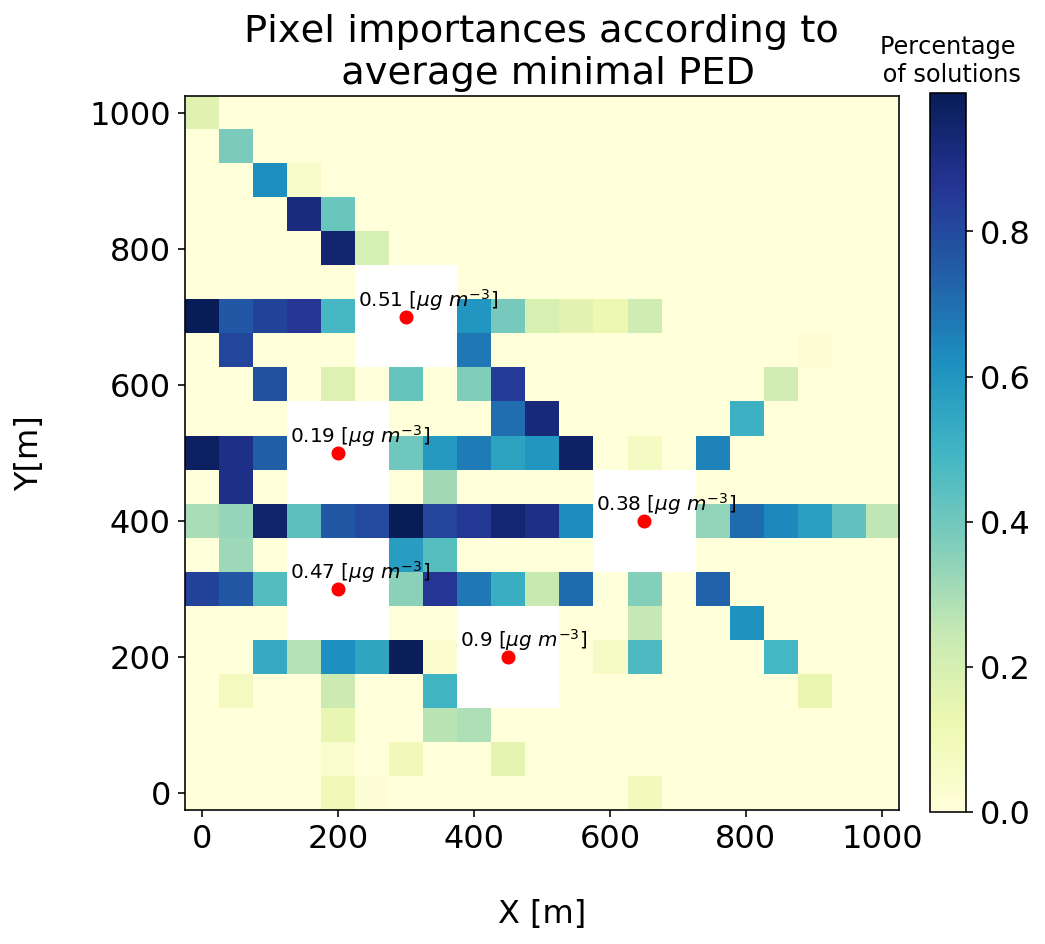

In [412]:
# plot sources
emissionRates = ['0.47 $[\mu g~m^{-3}]$', '0.51 $[\mu g~m^{-3}]$', '0.38 $[\mu g~m^{-3}]$', '0.9 $[\mu g~m^{-3}]$', '0.19 $[\mu g~m^{-3}]$']
sourceLoc = np.array([[200,300],[300,700],[650,400],[450,200],[200,500]])/50
fig, ax = plt.subplots(figsize = (7, 7))
plt.scatter(sourceLoc[:,0], sourceLoc[:,1], marker='o', color='red',edgecolors='red')
# add labels of the sources 
for i in range(np.size(emissionRates)):
    plt.text(sourceLoc[i,0]-1.4, sourceLoc[i,1]+0.3, emissionRates[i], fontsize=10)
plt.xlim([-0.5,20.5])
plt.ylim([-0.5,20.5])
plt.xlabel('\nX [m]')
plt.ylabel('Y[m]\n')
plt.yticks(np.arange(0,22,4), (np.arange(0,1200,200)))
plt.xticks(np.arange(0,22,4), (np.arange(0,1200,200)))

# Plot pixel importances
plt.imshow(importances_reshaped/100, cmap=plt.cm.YlGnBu, origin='lower')

cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.set_title('Percentage\n of solutions',loc='center',fontsize=12)

# plt.gca().xaxis.tick_bottom() #if matshow is used
plt.title("Pixel importances according to\n average minimal PED")
plt.rcParams.update({'font.size': 16})
# fig.savefig('Pixel_importances.png', bbox_inches='tight', dpi=400)
plt.show();

## Look at average concentration map of 5 active sources 

In [423]:
totalField = np.load('/Users/iditbela/Documents/Borg_python/optimization_code/weightedField.npy')

In [424]:
np.shape(totalField)
totalField = totalField*1e9

(441, 32)

In [425]:
# the last column is the 5 active sources 

# totalField[:,31]

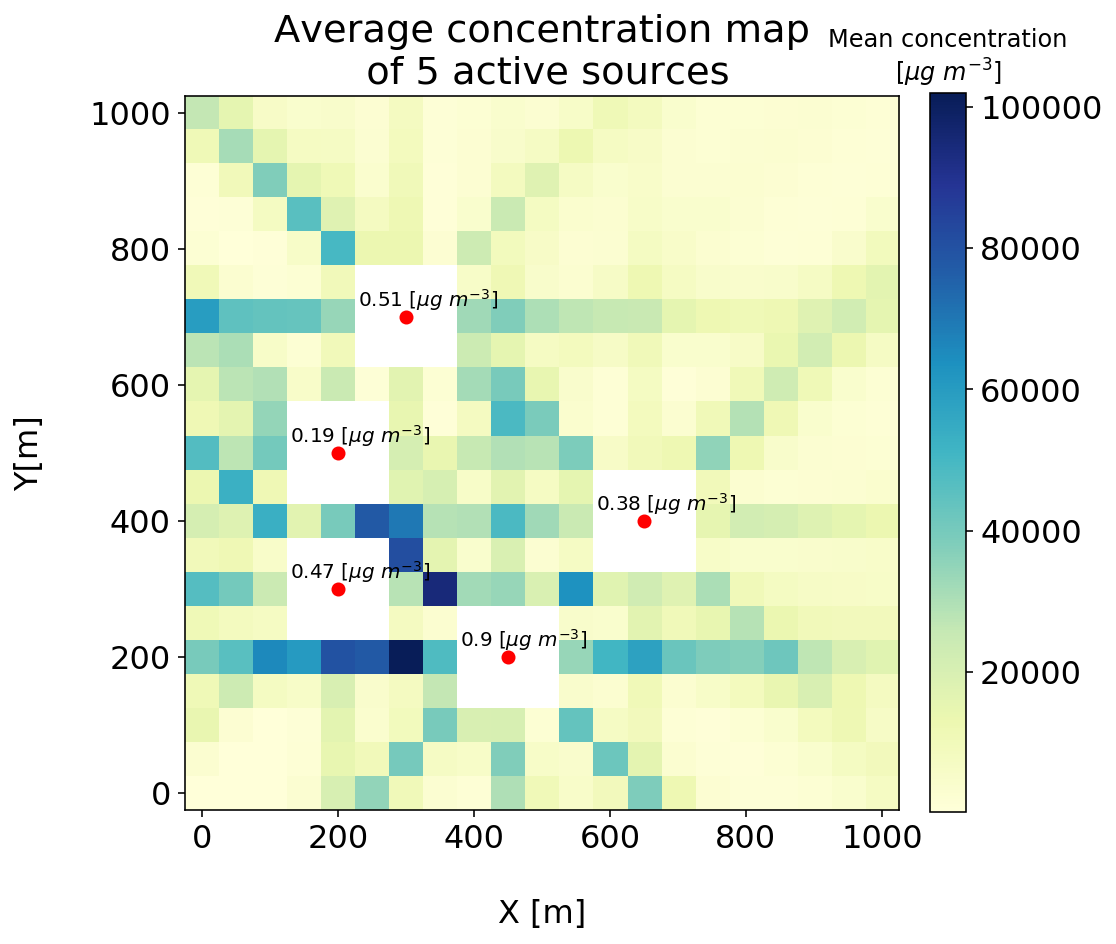

In [431]:
# plot sources
emissionRates = ['0.47 $[\mu g~m^{-3}]$', '0.51 $[\mu g~m^{-3}]$', '0.38 $[\mu g~m^{-3}]$', '0.9 $[\mu g~m^{-3}]$', '0.19 $[\mu g~m^{-3}]$']
sourceLoc = np.array([[200,300],[300,700],[650,400],[450,200],[200,500]])/50
fig, ax = plt.subplots(figsize = (7, 7))
plt.scatter(sourceLoc[:,0], sourceLoc[:,1], marker='o', color='red',edgecolors='red')
# add labels of the sources 
for i in range(np.size(emissionRates)):
    plt.text(sourceLoc[i,0]-1.4, sourceLoc[i,1]+0.3, emissionRates[i], fontsize=10)
plt.xlim([-0.5,20.5])
plt.ylim([-0.5,20.5])
plt.xlabel('\nX [m]')
plt.ylabel('Y[m]\n')
plt.yticks(np.arange(0,22,4), (np.arange(0,1200,200)))
plt.xticks(np.arange(0,22,4), (np.arange(0,1200,200)))


# Plot pixel importances
plt.imshow(totalField[:,31].reshape((21,21),order='F'), cmap=plt.cm.YlGnBu,origin='lower')
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.set_title('Mean concentration\n$[\mu g~m^{-3}]$',loc='center',fontsize=12)

# plt.gca().xaxis.tick_bottom() #if matshow is used
plt.title("Average concentration map\n of 5 active sources")
plt.rcParams.update({'font.size': 16})

# fig.savefig('Average_concentration_map.png', bbox_inches='tight', dpi=400)
plt.show();

## find correlation and RMSE

In [24]:
concentrations = totalField[~np.isnan(totalField[:,31]),31]
# fix values of concentrations
concentrations = concentrations*1e9

In [25]:
np.corrcoef(importances, concentrations)

array([[1.       , 0.7460216],
       [0.7460216, 1.       ]])

In [26]:
# fix values of PED
objs.iloc[:,1] = objs.iloc[:,1]*(-1)*1e9

In [27]:
# first sort objs and vars
sort_idx = np.argsort(objs.iloc[:,0])
sorted_vars = vars.iloc[sort_idx,:]
sorted_objs = objs.iloc[sort_idx,:]

In [28]:
from sklearn.metrics import mean_squared_error

result = []
for i in range(np.size(sorted_objs,0)):
    n = int(sorted_objs.iloc[i,0])
    maxAvgConcIdx = (-concentrations).argsort()[:n]
    maxAvgConc = concentrations[maxAvgConcIdx]
    solConcIdx = (-importances.values).argsort()[:n]
    maxSolConc = concentrations[solConcIdx]
    rmse = np.sqrt(mean_squared_error(maxAvgConc, maxSolConc))  #RMSE
    result.append(rmse)


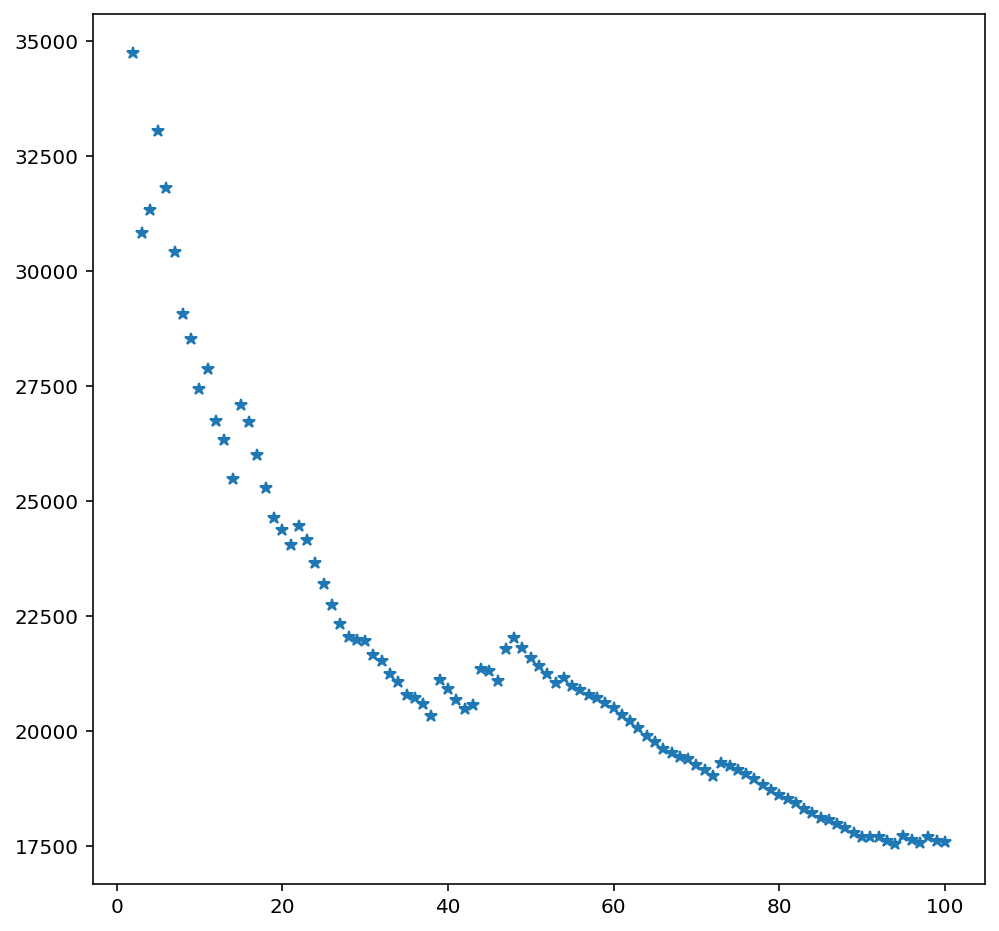

In [29]:
# Plot RMSE
fig, ax = plt.subplots(figsize = (8, 8))
plt.plot(sorted_objs.iloc[:,0],result,'*')
plt.show();

In [30]:
# correlation between locations 

In [31]:
corrs = []
for i in range(np.size(sorted_objs,0)):
    n = int(sorted_objs.iloc[i,0])
    temp1 = np.zeros(np.size(concentrations))
    temp2 = np.zeros(np.size(importances))
    
    maxAvgConcIdx = (-concentrations).argsort()[:n]
    temp1[maxAvgConcIdx] = concentrations[maxAvgConcIdx]
    
    solIdx = (-importances.values).argsort()[:n]
    temp2[solIdx] = importances.iloc[solIdx]
    
    correlation = np.corrcoef(temp1, temp2)[0,1]
    
    corrs.append(correlation)


In [32]:
np.corrcoef(importances, concentrations)

array([[1.       , 0.7460216],
       [0.7460216, 1.       ]])

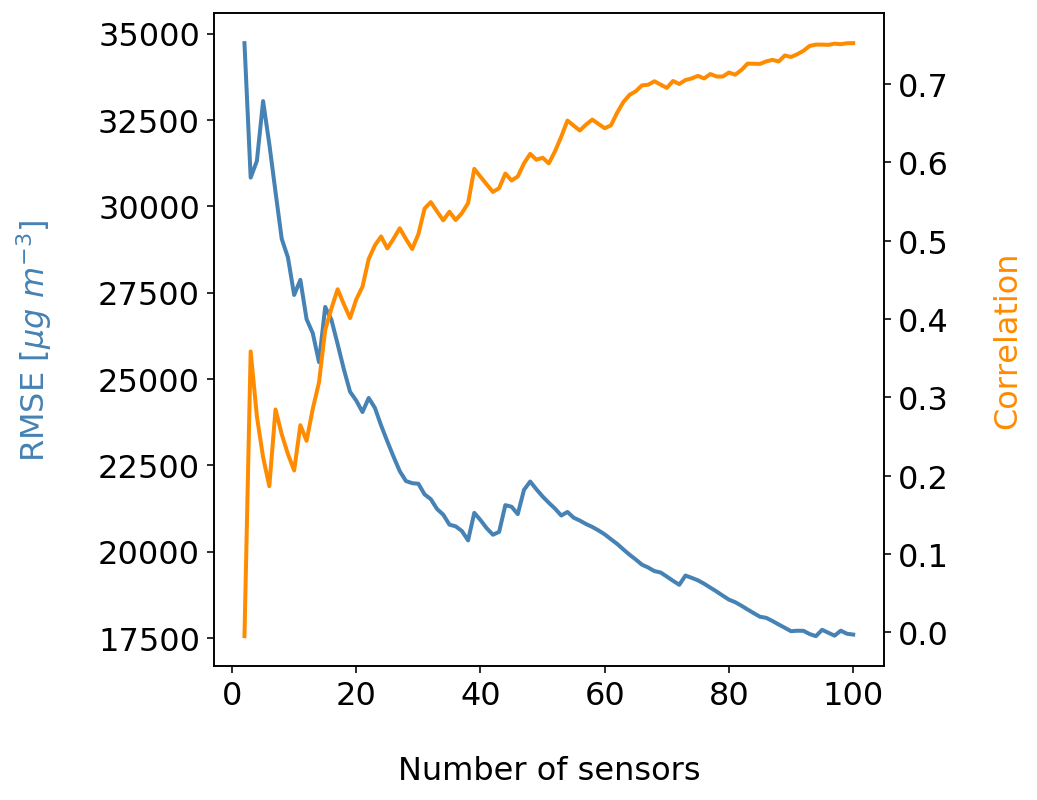

In [197]:
# plot it together 
fig, ax1 = plt.subplots(figsize = (6, 6))
ax2 = ax1.twinx()

ax1.plot(sorted_objs.iloc[:,0],result,'steelblue',linewidth=2)
ax2.plot(sorted_objs.iloc[:,0],corrs,'darkorange',linewidth=2)

ax1.set_xlabel('\nNumber of sensors')
ax1.set_ylabel('RMSE [$\mu g~m^{-3}$]\n', color='steelblue')
ax2.set_ylabel('\nCorrelation', color='darkorange')
plt.rcParams.update({'font.size': 16})
# fig.savefig('RMSE_correlation.png', bbox_inches='tight', dpi=400)
plt.show();

In [34]:
# export data to matlab

In [35]:
nan_idx

array([ 68,  69,  70,  72,  73,  74,  89,  90,  91,  93,  94,  95, 110,
       111, 112, 114, 115, 116, 118, 119, 120, 139, 140, 141, 160, 161,
       162, 171, 172, 173, 192, 193, 194, 213, 214, 215, 259, 260, 261,
       280, 281, 282, 301, 302, 303])

In [36]:
nan_idx = np.load(resultsPath+'nan_idx.npy')

In [37]:
avg_conc = np.zeros(441,)

In [38]:
avg_conc[nan_idx] = None

In [39]:
avg_conc[~np.isnan(avg_conc)] = concentrations

In [40]:
avg_conc = avg_conc.reshape((21,21),order='F')

In [41]:
np.shape(avg_conc)

(21, 21)

In [42]:
vars_reshaped = np.zeros((99,441))

In [43]:
vars_reshaped[:,nan_idx] = None

In [44]:
np.shape(vars_reshaped[:,~np.all(np.isnan(vars_reshaped), axis=0)])

(99, 396)

In [45]:
vars_reshaped[:,~np.all(np.isnan(vars_reshaped), axis=0)] = sorted_vars.values

In [46]:
import scipy.io as sio

sio.savemat('sorted_vars.mat', {'vars': vars_reshaped})
sio.savemat('sorted_objs.mat', {'objs': sorted_objs.values})
sio.savemat('avg_conc.mat', {'avg_conc': avg_conc})

# Look at solutions one by one with pause, with minimal PED values matrix 

In [57]:
sorted_vars

1    2    3    4    5    6    7    8    9    10  ...   387  388  389  390  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
17  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
18  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
19  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
20  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
21  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
22  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
23  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
24  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
25  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
26  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
27  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
28  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
29  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...  ...   
69  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
70  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
71  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
72  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
73  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
74  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
75  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
76  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
77  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
78  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
79  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
80  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
81  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
82  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
83  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
84  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
85  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0  0.0  0.0   
86  0.0  0.0  0.0  0.0  0.0  0.0  1

In [56]:
sorted_objs.columns = ['numSens','mean_PED']
sorted_objs.reset_index(drop=True, inplace = True)
sorted_vars.reset_index(drop=True, inplace = True)

# plot solutions

In [127]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

In [167]:
sensorLoc

array([[ 4,  6],
       [ 8,  6],
       [14,  0]])

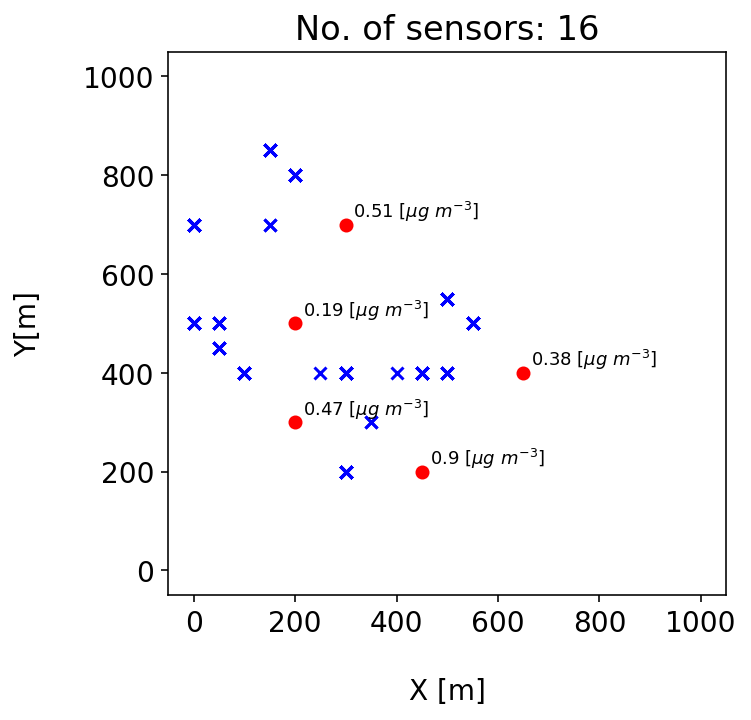

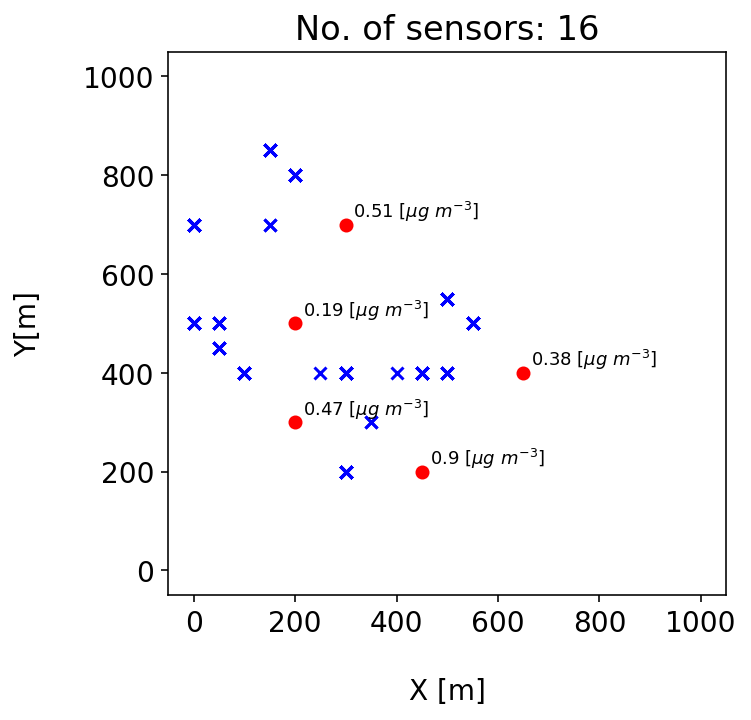

In [442]:
# plot sources
emissionRates = ['0.47 $[\mu g~m^{-3}]$', '0.51 $[\mu g~m^{-3}]$', '0.38 $[\mu g~m^{-3}]$', '0.9 $[\mu g~m^{-3}]$', '0.19 $[\mu g~m^{-3}]$']
sourceLoc = np.array([[200,300],[300,700],[650,400],[450,200],[200,500]])/50
fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(sourceLoc[:,0], sourceLoc[:,1], marker='o', color='red',edgecolors='red')
# add labels of the sources 
for i in range(np.size(emissionRates)):
    plt.text(sourceLoc[i,0]+0.3, sourceLoc[i,1]+0.3, emissionRates[i], fontsize=9)
plt.xlim([-1,21])
plt.ylim([-1,21])

# plot sensors 
for j in range(15):
    sol_reshaped = np.zeros(441,)
    sol_reshaped[nan_idx] = None
    sol_reshaped[~np.isnan(sol_reshaped)] = sorted_vars.iloc[j,:]
    sol_reshaped = sol_reshaped.reshape((21,21),order='F')
    sensorLoc = np.argwhere(sol_reshaped==1)
    plt.scatter(sensorLoc[:,1], sensorLoc[:,0], marker='x', color='blue') # the order of x and y is upsidedown because argwhere gives row and column which is y and x
    plt.xlim([-1,21])
    plt.ylim([-1,21])
    ax.set_title('No. of sensors: '+ np.str(int(sorted_objs.iloc[j,0]))) # day or night
    
    # set the limits of the plot to the limits of the data
    
    plt.xlabel('\nX [m]')
    plt.ylabel('Y[m]\n')
    plt.yticks(np.arange(0,22,4), (np.arange(0,1200,200)))
    plt.xticks(np.arange(0,22,4), (np.arange(0,1200,200)))
    plt.rcParams.update({'font.size': 14})
#     fig.savefig('sol_'+np.str(int(sorted_objs.iloc[j,0]))+'.png', bbox_inches='tight', dpi=400)

    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)
    
plt.show();

## Create an aminamtion of solutions 

In [458]:
import imageio
images = []
filenames = ['sol_'+np.str(int(sorted_objs.iloc[j,0]))+'.png' for j in range(40)]
for filename in filenames:
    images.append(imageio.imread(filename))
    

In [ ]:
imageio.mimsave('sol_movie.gif', images,duration=1)

## plot PEDs matrix 

In [444]:
totalField = np.load('/Users/iditbela/Documents/Borg_python/optimization_code/weightedField.npy')
total_active = np.load('/Users/iditbela/Documents/Borg_python/optimization_code/total_active.npy')
nan_idx = np.load('/Users/iditbela/Documents/Borg_python/optimization_code/nan_idx.npy')
import data_preparation_functions

In [445]:
np.shape(totalField)

(441, 32)

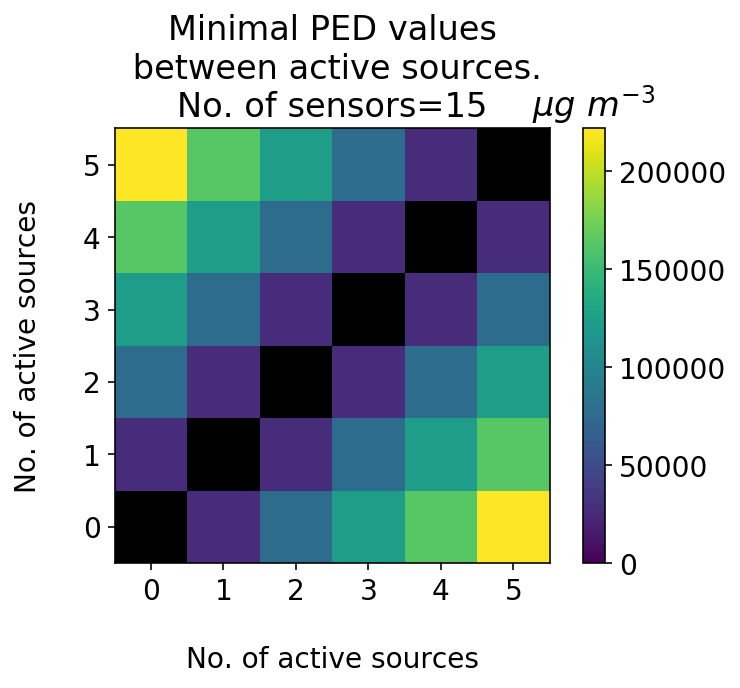

In [446]:
# PED matrix
max_sensors = 3
thr, dyR = 1,1

sol = 15
    
totalField = np.load('/Users/iditbela/Documents/Borg_python/optimization_code/weightedField.npy')
total_active = np.load('/Users/iditbela/Documents/Borg_python/optimization_code/total_active.npy')
nan_idx = np.load('/Users/iditbela/Documents/Borg_python/optimization_code/nan_idx.npy')

ind_sol = np.argwhere(sorted_objs.numSens == sol)
# ** where is the sensorIdx
sensorIdx = np.argwhere(sorted_vars.iloc[ind_sol.ravel(),:].values.ravel()).ravel()

# ** remove the nan rows **
totalField = np.delete(totalField, nan_idx, axis=0)
# ** calculate PED
PEDs, scenario_pairs = data_preparation_functions.calcSensorsPED(totalField, total_active, sensorIdx, thr, dyR)
[c, idx] = np.unique(np.sort(scenario_pairs[:, 2:4], axis=1), axis=0, return_inverse=True)
min_PED = PEDs.groupby(idx).min()*1e9
temp = np.concatenate((c,min_PED.values),axis=1)

z = np.zeros((6,6))
x = np.arange(0,6)
y = np.arange(0,6)
for i in range(np.shape(temp)[0]):
    z[int(temp[i,0]),int(temp[i,1])] = temp[i,2]
w = np.transpose(z)

fig, ax = plt.subplots()
cmap = plt.cm.viridis
cmap.set_under(color='black')    
plt.imshow(z+w, interpolation='none', cmap=cmap, vmin=0.0000001, origin='lower')
ax.set_title('Minimal PED values\n between active sources.\n'+'No. of sensors='+np.str(sol))
plt.xticks(np.arange(0,6), (np.arange(0,6)))
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")
cbar.ax.set_title('$\mu g~m^{-3}$')
plt.xlabel('\nNo. of active sources')
plt.ylabel('No. of active sources\n')
plt.rcParams.update({'font.size': 14})

# display.clear_output(wait=True)
# display.display(pl.gcf())
# time.sleep(1.0)

# fig.savefig('PED_matrix_sol_15.png', bbox_inches='tight', dpi=400)
plt.show();
    

In [441]:
temp

array([[0.00000000e+00, 1.00000000e+00, 2.83128296e+04],
       [0.00000000e+00, 2.00000000e+00, 7.82183810e+04],
       [0.00000000e+00, 3.00000000e+00, 1.24064325e+05],
       [0.00000000e+00, 4.00000000e+00, 1.64655718e+05],
       [0.00000000e+00, 5.00000000e+00, 2.22035643e+05],
       [1.00000000e+00, 2.00000000e+00, 2.83128296e+04],
       [1.00000000e+00, 3.00000000e+00, 7.82183810e+04],
       [1.00000000e+00, 4.00000000e+00, 1.24064325e+05],
       [1.00000000e+00, 5.00000000e+00, 1.64655718e+05],
       [2.00000000e+00, 3.00000000e+00, 2.83128296e+04],
       [2.00000000e+00, 4.00000000e+00, 7.82183810e+04],
       [2.00000000e+00, 5.00000000e+00, 1.24064325e+05],
       [3.00000000e+00, 4.00000000e+00, 2.83128296e+04],
       [3.00000000e+00, 5.00000000e+00, 7.82183810e+04],
       [4.00000000e+00, 5.00000000e+00, 2.83128296e+04]])

# PARETO FRONTIER

# Boxplot of optimal Vs. random

In [4]:
optimal_PEDs = np.load('/Users/iditbela/Documents/Borg_python/optimization_code/optimal_PEDs.npy')

In [6]:
total_nonOptimal_PEDs = np.load('/Users/iditbela/Documents/Borg_python/optimization_code/total_nonOptimal_PEDs.npy')

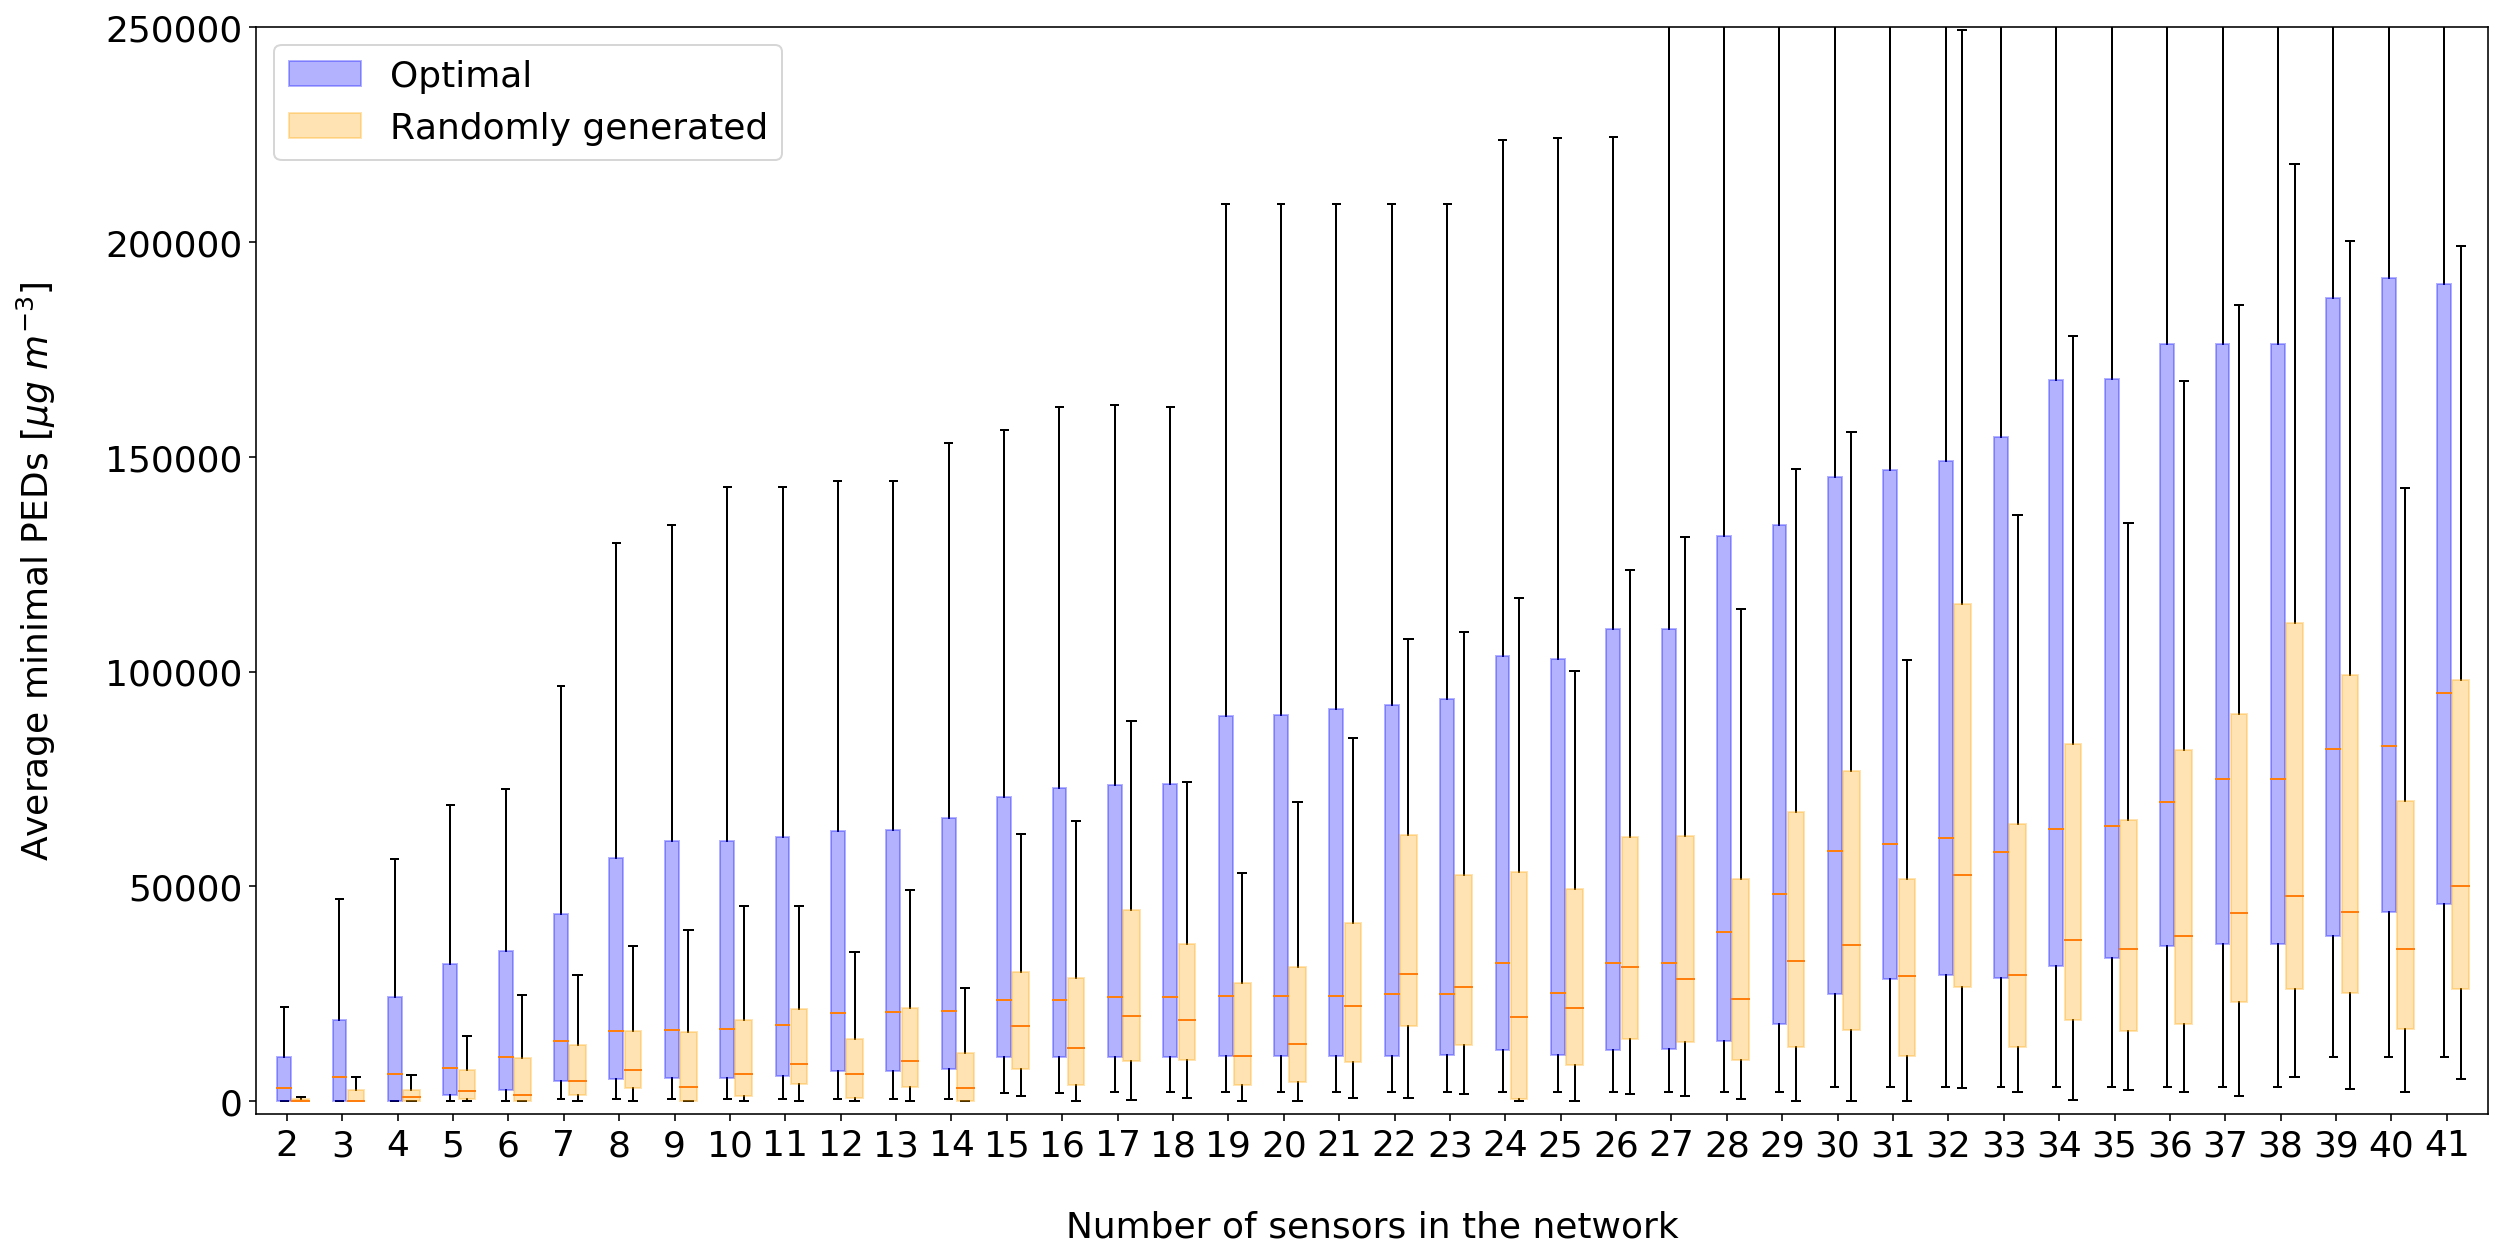

In [42]:
nonOptimalRand = 1 # number out of 100 generated 

# boxplot compare optimal Vs. non-optimal
fig, ax = plt.subplots(figsize = (20, 10))
# plt.title('Solution comparison')
# optimal
bpOptimal = plt.boxplot(1e9*optimal_PEDs[0:40,:].transpose(), showfliers=False, positions = np.arange(1,41)-0.3, widths=0.25, patch_artist=True)
plt.setp(bpOptimal['boxes'], color='blue')
for patch in bpOptimal['boxes']:
    patch.set_facecolor('blue')
    patch.set_alpha(0.3)
# non-optimal
bpnonOptimal = plt.boxplot(1e9*total_nonOptimal_PEDs[0:40,:,nonOptimalRand].transpose(), showfliers=False, positions = np.arange(1,41), widths=0.3, patch_artist=True)
plt.setp(bpnonOptimal['boxes'], color='orange')
for patch in bpnonOptimal['boxes']:
    patch.set_facecolor('orange')
    patch.set_alpha(0.3)

ax.legend([bpOptimal['boxes'][0], bpnonOptimal['boxes'][0]], ['Optimal', 'Randomly generated'], loc='upper left')    

plt.ylim([-3000,0.00025*1e9])
plt.xlabel('\nNumber of sensors in the network')
plt.ylabel('Average minimal PEDs $[\mu g~m^{-3}]$\n')
# plt.yticks(np.arange(0,22,4), (np.arange(0,1200,200)))
plt.xticks(np.arange(1,41)-0.25, (np.arange(2,42)))
# ax.set_xticklabels(np.arange(2,42))
plt.rcParams.update({'font.size': 18})
    
fig.savefig('solution_comparison.png', bbox_inches='tight', dpi=400)
plt.show();

## Evaluate through a randomly placed array of sensors. make sure my optimization finds the minimal PED values

In [51]:
# (1) - generate all possible states/maps (number of maps = 32*144) when stacks emit average emissionss
df = pd.read_pickle("/Users/iditbela/Documents/Borg_python/optimization_code/optimization_notebooks/WF_2004_2018_Hadera")
# df is sorted
# 144 states have certain probability different than zero
numStates = df.loc[df.percent != 0,'s'].count()

In [52]:
totalTotalField = np.zeros((np.shape(totalField)[0],np.shape(totalField)[1],numStates))# just using this one for the shape

In [ ]:
# for state in range(numStates):
# #     wf = df.iloc[state].percent
#     WD = df.iloc[state].WD_to_apply
#     WS = df.iloc[state].WS_to_apply
#     ASC = df.iloc[state].SC_to_apply
#     totalField, total_active = data_preparation_functions.calcSensorsReadings(Q_source, sensorArray, WD, WS, ASC)
#     totalTotalField[:,:,state] = totalField
    
# np.save('totalTotalField', totalTotalField)

In [ ]:
# (2) compare PEDs of optimal Vs. non-optimal solutions (randomly generated) for all 144 weather states




# DUMP

In [ ]:
# df['SC_numeric'] = df['SC']
# df.loc[df['SC_numeric']=='A','SC_numeric']=1
# df.loc[df['SC_numeric']=='B','SC_numeric']=2
# df.loc[df['SC_numeric']=='C','SC_numeric']=3
# df.loc[df['SC_numeric']=='D','SC_numeric']=4
# df.loc[df['SC_numeric']=='E','SC_numeric']=5
# df.loc[df['SC_numeric']=='F','SC_numeric']=6

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df['WD'].values,df['WS'].values,df['SC_numeric'].values)
# plt.show();